# Insurance Fraud Detection - A Data Story


# **Executive Summary**
In this comprehensive analysis, I examine insurance claim fraud patterns using a dataset sourced from Kaggle. For the purpose of this exercise, I will assume this data represents GEICO's insurance claims from January to March 2015, including 1,000 claims across seven states in the United States.

Through this analysis, I aim to identify patterns and develop actionable insights that can enhance GEICO's fraud detection capabilities and reduce financial losses.

## **Analysis Objectives**

My investigation seeks to answer five critical questions that will inform GEICO's fraud prevention strategy:

1. Who commits fraud? - I'll identify demographic and behavioral profiles of fraudulent claimants
2. When does fraud occur? - I'll uncover temporal patterns in fraudulent activity
3. Where does fraud happen? - I'll map geographic hotspots and regional variations
4. What types of incidents are fraudulent? - I'll explore which claim types carry highest risk
5. How much does fraud cost? - I'll quantify the financial impact on the business

## **Key Findings Preview**

My analysis reveals that 24.7% of claims in this dataset are fraudulent, with fraudulent claims averaging $60,302 - nearly 20% higher than legitimate claims. I've uncovered patterns including higher fraud rates among long-term customers, executive professionals and in single-vehicle collision incidents. My geographic analysis shows significant variation across states, with Ohio exhibiting fraud rates of 43.5% despite representing only 2.3% of total claims.

In the following comprehensive analysis, I provide detailed insights through data exploration, statistical analysis and visualization to support data-driven fraud detection strategies.

## Table of Contents
<a id='Table of contents'></a>

### <a href='#1. Data Understanding & Hygiene Phase'> 1. Data Understanding & Hygiene Phase </a>
* <a href='#1.1 Data Import'> 1.1 Data Import </a>
* <a href='#1.2 Dataset Overview and Preliminary Data Quality Check'> 1.2 Dataset Overview and Preliminary Data Quality Check </a>
* <a href='#1.3 Initial Variables Exploration'> 1.3 Initial Variables Exploration </a>
* <a href='#1.4 Data Cleaning'> 1.4 Data Cleaning </a>

### <a href='#2. Exploratory Data Analysis'> 2. Exploratory Data Analysis </a>
* <a href='#2.1 Overall Fraud Statistics '> 2.1 Overall Fraud Statistics </a>
* <a href='#2.2 Fraud Patterns by Incident Type'> 2.2 Fraud Patterns by Incident Type </a>
* <a href='#2.3 Fraud Patterns Time Series'> 2.3 Fraud Patterns Time Series </a>
* <a href='#2.4 Financial Analysis of Fraudulent Claims'> 2.4 Financial Analysis of Fraudulent Claims </a>
* <a href='#2.5 Behavioral Indicators of Fraud'> 2.5 Behavioral Indicators of Fraud </a>
* <a href='#2.6 Customer Profile Analysis'> 2.6 Customer Profile Analysis </a>
* <a href='#2.7 Vehicle Analysis'> 2.7 Vehicle Analysis </a>
* <a href='#2.8 Geographic Fraud Analysis'> 2.8 Geographic Fraud Analysis </a>
* <a href='#2.9 Risk Scoring Insights'> 2.9 Risk Scoring Insights </a>
* <a href='#2.10 Correlation Analysis'> 2.10 Correlation Analysis </a>
* <a href='#2.11 Summary of Key Findings'> 2.11 Summary of Key Findings </a>

### <a href='#3. Building the Dashboard'> 2. Building the Dashboard </a>
* <a href='#3.1 Export dataset for visualization'> 3.1 Export dataset for visualization </a>

## 1. Data Understanding & Hygiene Phase
<a id='1. Data Understanding & Hygiene Phase'></a>

### 1.1. Data Import

<a id='1.1. Data Import'></a>


First, let's load the necessary libraries for our analysis:

In [47]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from datetime import datetime
import missingno as msno
import re
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches

Next, let's load our Kaggle dataset and perform an initial inspection:


In [2]:
# Loading the Kaggle sample dataset from a csv file
insurance_data = pd.read_csv('/content/sample_data/insurance_claims.csv')

# Verify that the dataset has been loaded successfully by checking the first few rows
print("Insurance Fraud Dataset Sample - First 5 rows:")
display(insurance_data.head())

Insurance Fraud Dataset Sample - First 5 rows:


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


At first glance, I'm noticing some missing values in the 'police_report_available', 'property_damage' and 'collision_type' columns. I'll need to investigate this further.

In [3]:
# Let's make a copy of the dataset to keep the original one intact
insurance_fraud_df = insurance_data.copy()

### 1.2. Dataset Overview and Preliminary Data Quality Check

<a id='1.2. Dataset Overview and Preliminary Data Quality Check'></a>

Let's check the dimensions of our dataset and its size:

In [4]:
# Get dimensions of the dataset
insurance_shape = insurance_fraud_df.shape

print(f"Insurance Fraud Dataset Sample dimensions: {insurance_shape[0]} rows, {insurance_shape[1]} columns")

Insurance Fraud Dataset Sample dimensions: 1000 rows, 39 columns


In [5]:
# Generating descriptive statistics of the dataset
insurance_fraud_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Now, let's take a look at the columns in the dataset and understand what information it contains:

In [6]:
# Print all column names
print(insurance_fraud_df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [7]:
# Data Dictionary for the Insurance Fraud Dataset Sample
data_columns = {
    'months_as_customer': 'Number of months the person has been a customer with the insurance company',
    'age': 'Age of the insured person in years',
    'policy_number': 'Unique identifier for the insurance policy',
    'policy_bind_date': 'Date when the insurance policy was bound/started',
    'policy_state': 'US state where the policy was issued',
    'policy_csl': 'Combined Single Limit - liability coverage limits in format "per person/per accident" (thousands)',
    'policy_deductable': 'Deductible amount in dollars that the insured must pay before insurance coverage begins',
    'policy_annual_premium': 'Annual premium amount in dollars paid for the insurance policy',
    'umbrella_limit': 'Umbrella policy limit in dollars (additional liability coverage above standard policy)',
    'insured_zip': 'Unsure - these are 6-digit codes so they are not US zip codes. Could be agent territories, branch codes, or customer segment identifiers',
    'insured_sex': 'Gender of the insured person',
    'insured_education_level': 'Highest education level achieved by the insured',
    'insured_occupation': 'Profession of the insured person',
    'insured_hobbies': 'Recreational hobbies of the insured person',
    'insured_relationship': 'Relationship status of the insured',
    'capital-gains': 'Capital gains in dollars reported by the insured',
    'capital-loss': 'Capital losses in dollars reported by the insured',
    'incident_date': 'Date when the incident/claim occurred',
    'incident_type': 'Type of incident',
    'collision_type': 'Type of collision',
    'incident_severity': 'Severity level of the incident',
    'authorities_contacted': 'Which authorities were contacted',
    'incident_state': 'US state where the incident occurred',
    'incident_city': 'City where the incident occurred',
    'incident_location': 'Street address or location description of the incident',
    'incident_hour_of_the_day': 'Hour of the day when incident occurred (0-23)',
    'number_of_vehicles_involved': 'Number of vehicles involved in the incident',
    'property_damage': 'Whether property damage occurred',
    'bodily_injuries': 'Number of bodily injuries reported in the incident',
    'witnesses': 'Number of witnesses present at the incident',
    'police_report_available': 'Whether a police report is available',
    'total_claim_amount': 'Total claim amount in dollars',
    'injury_claim': 'Amount claimed for injuries in dollars',
    'property_claim': 'Amount claimed for property damage in dollars',
    'vehicle_claim': 'Amount claimed for vehicle damage in dollars',
    'auto_make': 'Manufacturer/brand of the vehicle',
    'auto_model': 'Model of the vehicle',
    'auto_year': 'Year of manufacture of the vehicle',
    'fraud_reported': 'Whether the claim was reported as fraudulent'
}

# Print to verify column descriptions match our dataset
print("Verifying columns in Insurance Fraud Dataset:")
for col in insurance_fraud_df.columns:
    print(f"- {col}: {data_columns.get(col, 'Description missing')}")

Verifying columns in Insurance Fraud Dataset:
- months_as_customer: Number of months the person has been a customer with the insurance company
- age: Age of the insured person in years
- policy_number: Unique identifier for the insurance policy
- policy_bind_date: Date when the insurance policy was bound/started
- policy_state: US state where the policy was issued
- policy_csl: Combined Single Limit - liability coverage limits in format "per person/per accident" (thousands)
- policy_deductable: Deductible amount in dollars that the insured must pay before insurance coverage begins
- policy_annual_premium: Annual premium amount in dollars paid for the insurance policy
- umbrella_limit: Umbrella policy limit in dollars (additional liability coverage above standard policy)
- insured_zip: Unsure - these are 6-digit codes so they are not US zip codes. Could be agent territories, branch codes, or customer segment identifiers
- insured_sex: Gender of the insured person
- insured_education_lev

Now, let's examine the structure and data types of the dataset:

In [8]:
# Display dataset information
print("Insurance Fraud Dataset Sample Information:")
insurance_fraud_df.info()

Insurance Fraud Dataset Sample Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000

Observations on the dataset fields:

1. CUSTOMER & POLICY INFORMATION (Columns 1-9)
   - Customer tenure and demographics (months_as_customer, age)
   - Policy identification and dates (policy_number, policy_bind_date)
   - Coverage details (policy_state, policy_csl, policy_deductable, policy_annual_premium)
   - Additional coverage (umbrella_limit)
   
   These fields establish the insurance relationship and coverage terms before any incident.

2. INSURED PERSON PROFILE (Columns 10-17)
   - Possibly agent territories or branch codes (insured_zip)
   - Demographics (insured_sex, insured_education_level)
   - Lifestyle indicators (insured_occupation, insured_hobbies)
   - Personal status (insured_relationship)
   - Financial indicators (capital-gains, capital-loss)
   
   This profile helps assess risk factors and potential fraud indicators based on personal characteristics and financial situation.

3. INCIDENT DETAILS (Columns 18-28)
   - Temporal information (incident_date, incident_hour_of_the_day)
   - Incident classification (incident_type, collision_type, incident_severity)
   - Response and reporting (authorities_contacted, police_report_available)
   - Location specifics (incident_state, incident_city, incident_location)
   - Incident scope (number_of_vehicles_involved, property_damage)
   
   These fields capture the who, what, when, and where of the insurance claim event.

4. CLAIM IMPACT METRICS (Columns 29-35)
   - Human impact (bodily_injuries, witnesses)
   - Financial impact breakdown:
     * total_claim_amount (overall claim value)
     * injury_claim (medical/injury compensation)
     * property_claim (property damage compensation)
     * vehicle_claim (vehicle repair/replacement costs)
   
   These metrics quantify the severity and financial implications of the claim.

5. VEHICLE INFORMATION (Columns 36-38)
   - Vehicle identification (auto_make, auto_model, auto_year)
   
   Vehicle details that may correlate with claim patterns and fraud risk.

6. FRAUD INDICATOR (Column 39)
   - fraud_reported (Y/N flag indicating if claim was identified as fraudulent)
   
   The target variable for fraud detection modeling.

DATASET INSIGHTS:
- The data captures both static information (policy details, customer profile) and dynamic information (incident specifics, claim amounts)
- Multiple data types: temporal (dates/times), categorical (types/states),
  numerical (amounts/counts), and binary (YES/NO flags)
- Some fields contain missing values marked as "?" which need handling
- Financial fields like capital-loss use negative values
- Policy CSL values represent coverage limits in thousands (e.g., "250/500" means \$250K per person, \$500K per accident)

Considering the shape of the dataset, we can already see that some columns contain some missing data. Let's perform a quick check for missing values:

In [9]:
# Replace all "?" with NaN
insurance_fraud_df.replace("?", np.nan, inplace=True)

In [10]:
# Check for missing values in the dataset
data_missing = insurance_fraud_df.isna().sum()
data_missing_pct = (data_missing / len(insurance_fraud_df)) * 100

# Display columns with missing values in the dataset
print("Columns with missing values in Insurance Fraud Dataset Sample:")
data_missing_summary = pd.DataFrame({
    'Missing Count': data_missing,
    'Missing Percentage': data_missing_pct
})
display(data_missing_summary[data_missing_summary['Missing Count'] > 0])

Columns with missing values in Insurance Fraud Dataset Sample:


,Missing Count,Missing Percentage
collision_type,178,17.8
authorities_contacted,91,9.1
property_damage,360,36.0
police_report_available,343,34.3


Let's visualize the missing data patterns:

<Figure size 1200x600 with 0 Axes>

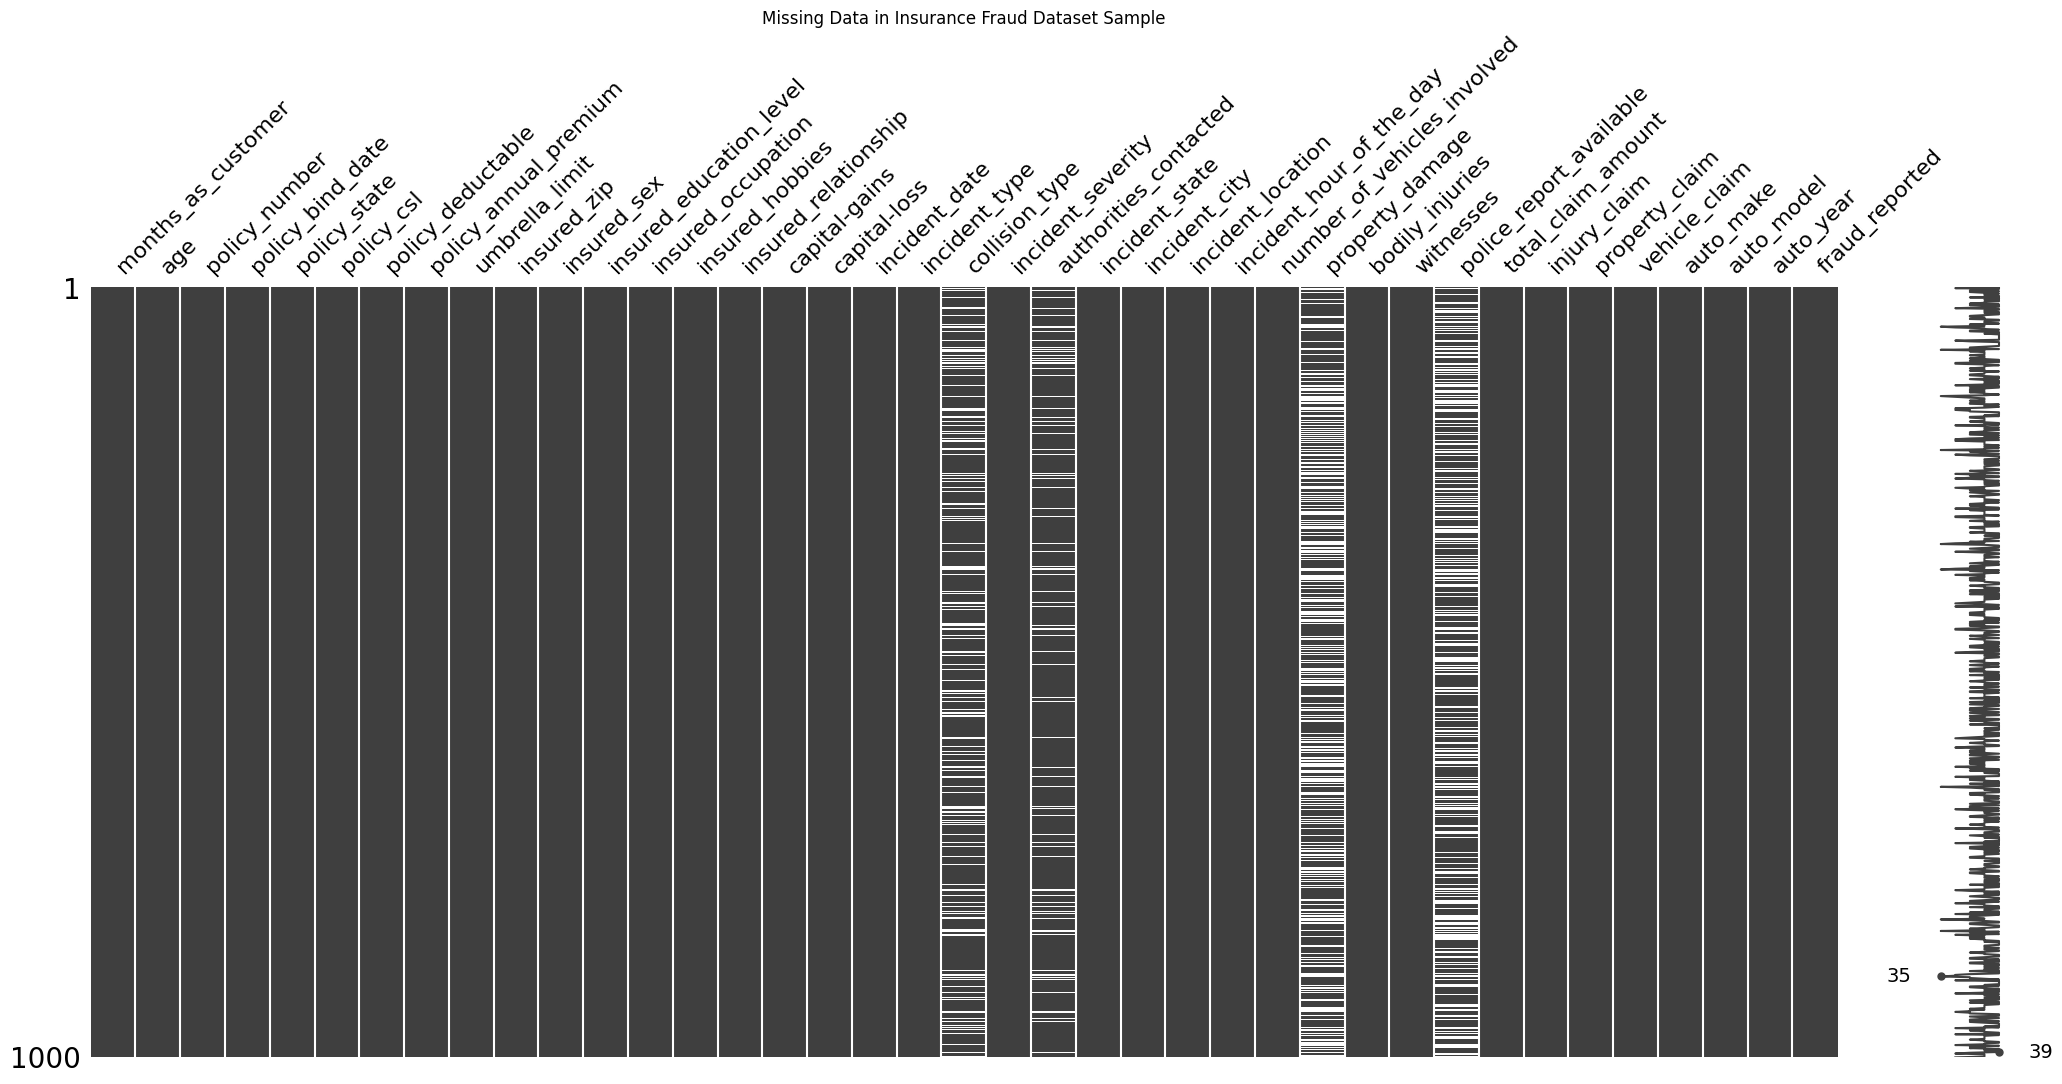

In [11]:
# Visualize missing data in Insurance Fraud Dataset
plt.figure(figsize=(12, 6))
msno.matrix(insurance_fraud_df)
plt.title('Missing Data in Insurance Fraud Dataset Sample')
plt.tight_layout()
plt.show()

Let's also check for duplicates:

In [12]:
# Check for duplicate rows in Insurance Fraud Dataset
duplicates = insurance_fraud_df.duplicated().sum()
print(f"Number of exact duplicate rows in Insurance Fraud Dataset Sample: {duplicates}")

Number of exact duplicate rows in Insurance Fraud Dataset Sample: 0


### 1.3 Initial Variables Exploration
<a id='1.3 Initial Variables Exploration'></a>

Let's explore the columns from the dataset, verify their integrity, and understand the information they contain:

* `months_as_customer`: ✅ Verified - no negative or float values
* `age`: ✅ Verified - no negative or float values. Age ranges from 19 to 64
* `policy_number`: Contains only 6-digit numbers
* `policy_state`: This dataset contains policies from three states: Ohio, Indiana, and Illinois
* `policy_csl`: Contains 3 types of liability coverage limits in "per person/per accident" format: '250/500', '100/300', '500/1000'
* `policy_deductable`:Three deductible amounts present: \$500, \$1000, \$2000
* `policy_annual_premium`: ✅ Verified - no negative values found
* `insured_zip`: All codes are 6 digits in length, confirming these are not US ZIP codes but rather internal territory or customer codes
* `insured_sex`: Gender is represented as either MALE or FEMALE
* `insured_education_level`:  Education levels present from lowest to highest: High School, Associate (2-year degree), College/Bachelor's (4-year degree), Masters, and terminal degrees (MD/JD/PhD)
* `insured_occupation`: ✅ Verified - No duplicates or inconsistencies
* `insured_hobbies`: ✅ Verified - No duplicates or inconsistencies
* `insured_relationship`: ✅ Verified - No duplicates or inconsistencies
* `capital-gains`: ✅ Verified - no negative values (as expected)
* `capital-loss`: ✅ Verified - contains only negative values or zero (as expected)
* `incident_type`: Four incident types present: 'Single Vehicle Collision', 'Vehicle Theft', 'Multi-vehicle Collision', and 'Parked Car'
* `incident_severity`: Four severity levels present: 'Major Damage', 'Minor Damage', 'Total Loss', and 'Trivial Damage'
* `incident_state`: Incidents occur across 7 states: SC, VA, NY, OH, WV, NC, PA
* `incident_city`: Seven cities represented: Columbus, Riverwood, Arlington, Springfield, Hillsdale, Northbend, Northbrook
* `incident_location`: 1000 unique accident locations
* `incident_hour_of_the_day`: ✅ Verified - no negative or float values. Valid 24-hour format (0-23)
* `number_of_vehicles_involved`: ✅ Verified - no negative or float values. Ranges from 1 to 4 vehicles, with single-vehicle incidents most common (581 cases)
* `bodily_injuries`: The bodily injuries range from 0 to 2
* `total_claim_amount`: ✅ Verified - no negative amounts found
* `injury_claim`: ✅ Verified - no negative amounts found
* `property_claim`: ✅ Verified - no negative amounts found
* `vehicle_claim`: ✅ Verified - no negative amounts found
* `auto_model`: Multiple models present, with RAM being the most frequently involved in accidents
* `auto_year`: Vehicle years vary, with 1995 models most frequently involved in accidents (notably the oldest in the dataset)
* `fraud_reported`: ✅ Verified - contains only Y/N values. As typical with fraud datasets, the label distribution is imbalanced

1) Age Validation

In [13]:
# Age validation

def validate_age(insurance_fraud_df):
    """
    Validates age column to ensure:
    - No negative numbers
    - No float values
    - No minors (age < 18)
    - No ages over 80
    """

    print("Validating age column...\n")

    # Get age column
    ages = insurance_fraud_df['age']

    # Check 1: Negative ages
    negative_ages = insurance_fraud_df[ages < 0]
    if len(negative_ages) > 0:
        print(f"❌ Found {len(negative_ages)} negative ages")
    else:
        print("✅ No negative ages")

    # Check 2: Float values
    float_ages = insurance_fraud_df[ages != ages.fillna(0).astype(int)]
    if len(float_ages) > 0:
        print(f"❌ Found {len(float_ages)} float ages")
    else:
        print("✅ All ages are integers")

    # Check 3: Minors (under 18)
    minors = insurance_fraud_df[ages < 18]
    if len(minors) > 0:
        print(f"❌ Found {len(minors)} minors (age < 18)")
    else:
        print("✅ No minors found")

    # Check 4: Over 80
    over_80 = insurance_fraud_df[ages > 80]
    if len(over_80) > 0:
        print(f"❌ Found {len(over_80)} people over 80")
    else:
        print("✅ No ages over 80")

    # Show age range
    print(f"\nAge range: {ages.min()} to {ages.max()}")
    print(f"Average age: {ages.mean():.1f}")


# Run validation
validate_age(insurance_fraud_df)

Validating age column...

✅ No negative ages
✅ All ages are integers
✅ No minors found
✅ No ages over 80

Age range: 19 to 64
Average age: 38.9


2) Policy Number Validation

In [14]:
# Policy number validation
def validate_policy_number(insurance_fraud_df):
    """
    Validates policy_number column to ensure all are 6-digit numbers
    """

    print("Validating policy_number column...\n")

    # Get policy numbers
    policy_numbers = insurance_fraud_df['policy_number']

    # Check if all are 6 digits (between 100000 and 999999)
    not_6_digits = insurance_fraud_df[(policy_numbers < 100000) | (policy_numbers > 999999)]

    if len(not_6_digits) > 0:
        print(f"❌ Found {len(not_6_digits)} policy numbers that are NOT 6 digits:")
        print("\nPolicy numbers with issues:")
        for idx, row in not_6_digits.iterrows():
            print(f"   Row {idx}: {row['policy_number']} ({len(str(int(row['policy_number'])))} digits)")
    else:
        print("✅ All policy numbers are 6 digits")

    # Show policy number range
    print(f"\nPolicy number range: {policy_numbers.min()} to {policy_numbers.max()}")


# Run validation
validate_policy_number(insurance_fraud_df)

Validating policy_number column...

✅ All policy numbers are 6 digits

Policy number range: 100804 to 999435


3) Policy Annual Premium Validation

In [15]:
# Validate policy_annual_premium for negative values
def validate_premium(insurance_fraud_df):
    """
    Checks that policy_annual_premium has no negative values
    """

    print("Validating policy_annual_premium column...\n")

    # Check for negative premiums
    negative_premiums = insurance_fraud_df[insurance_fraud_df['policy_annual_premium'] < 0]

    if len(negative_premiums) > 0:
        print(f"❌ Found {len(negative_premiums)} negative premiums:")
        print(negative_premiums[['policy_number', 'policy_annual_premium']])
    else:
        print("✅ No negative premiums found")

    # Show premium range
    premiums = insurance_fraud_df['policy_annual_premium']
    print(f"\nPremium range: ${premiums.min():.2f} to ${premiums.max():.2f}")
    print(f"Average premium: ${premiums.mean():.2f}")


# Run validation
validate_premium(insurance_fraud_df)

Validating policy_annual_premium column...

✅ No negative premiums found

Premium range: $433.33 to $2047.59
Average premium: $1256.41


4) Incident Hour Validation

In [16]:
# Validate incident_hour_of_the_day
def validate_incident_hour(insurance_fraud_df):
    """
    Validates incident_hour_of_the_day to ensure:
    - Values are between 0-23
    - No negative numbers
    - No float values
    """

    print("Validating incident_hour_of_the_day column...\n")

    # Get hour values
    hours = insurance_fraud_df['incident_hour_of_the_day']

    # Check for hours outside 0-23 range
    invalid_hours = insurance_fraud_df[(hours < 0) | (hours > 23)]
    if len(invalid_hours) > 0:
        print(f"❌ Found {len(invalid_hours)} invalid hours (outside 0-23):")
        print(invalid_hours[['incident_hour_of_the_day', 'incident_date']])
    else:
        print("✅ All hours are within 0-23 range")

    # Check for float values
    float_hours = insurance_fraud_df[hours != hours.fillna(0).astype(int)]
    if len(float_hours) > 0:
        print(f"❌ Found {len(float_hours)} float hour values")
    else:
        print("✅ All hours are integers")

    # Show hour distribution
    print(f"\nHour range: {hours.min()} to {hours.max()}")
    print(f"Most common hours: {hours.value_counts().head(3).to_dict()}")


# Run validation
validate_incident_hour(insurance_fraud_df)

Validating incident_hour_of_the_day column...

✅ All hours are within 0-23 range
✅ All hours are integers

Hour range: 0 to 23
Most common hours: {17: 54, 3: 53, 0: 52}


5) Claim Amount Validation

In [17]:
# Check that component claims sum to total
insurance_fraud_df['calculated_total'] = insurance_fraud_df['injury_claim'] + insurance_fraud_df['property_claim'] + insurance_fraud_df['vehicle_claim']
claim_discrepancies = insurance_fraud_df[insurance_fraud_df['total_claim_amount'] != insurance_fraud_df['calculated_total']]

print(f"Records with claim amounts that don't add up: {len(claim_discrepancies)}")

Records with claim amounts that don't add up: 0


### 1.4 Data Cleaning
<a id='1.4 Data Cleaning'></a>

**Data Cleaning Actions Taken:**

* `policy_bind_date`: Removed redundant timestamp (00:00:00) from all dates as it added no value
* `umbrella_limit`: Corrected one negative value to positive (likely a data entry error with sign reversal)
* `incident_date`: Removed redundant timestamp (00:00:00) from all dates
* `collision_type`: Through analysis, identified that NaN values correlate with non-collision incidents (e.g., theft, parked car). Replaced NaN with 'Not Applicable' for clarity
* `authorities_contacted`: 'None' values were being interpreted as NaN rather than as a string. Corrected this so they are properly recognized as "no authorities contacted"
* `property_damage`: Replaced NaN values with 'Unknown' as investigation showed no clear pattern with incident severity
* `police_report_available`: Replaced NaN values with 'Unknown' to maintain consistency in handling missing categorical data
* `auto_make`: 14 car brands represented: Saab, Mercedes, Dodge, Chevrolet, Acura, Nissan, Audi, Toyota, Ford, Subaru, BMW, Jeep, Honda, Volkswagen. The name of the brand Subaru was misspelled so I corrected it.

1) Policy Date Field Cleaning

In [18]:
# Clean policy_bind_date field
def clean_policy_dates(insurance_fraud_df):
    """
    Converts policy_bind_date to datetime format (removes time display)
    """

    print("Cleaning policy_bind_date column...\n")

    # Convert to datetime format
    insurance_fraud_df['policy_bind_date'] = pd.to_datetime(insurance_fraud_df['policy_bind_date'])

    print("✅ Converted to datetime format")
    print("✅ Time portion (00:00:00) won't display in dataframe")

    # Show sample of dates
    print(f"\nSample dates:")
    print(insurance_fraud_df['policy_bind_date'].head())

    # Show date range
    print(f"\nDate range: {insurance_fraud_df['policy_bind_date'].min()} to {insurance_fraud_df['policy_bind_date'].max()}")

    return insurance_fraud_df


# Run cleaning
insurance_fraud_df = clean_policy_dates(insurance_fraud_df)

Cleaning policy_bind_date column...

✅ Converted to datetime format
✅ Time portion (00:00:00) won't display in dataframe

Sample dates:
0   2014-10-17
1   2006-06-27
2   2000-09-06
3   1990-05-25
4   2014-06-06
Name: policy_bind_date, dtype: datetime64[ns]

Date range: 1990-01-08 00:00:00 to 2015-02-22 00:00:00


2) Umbrella Limit Field Cleaning

In [19]:
# Check the negative umbrella limit
negative_umbrella = insurance_fraud_df[insurance_fraud_df['umbrella_limit'] < 0]
print(f"Records with negative umbrella limit: {len(negative_umbrella)}")
if len(negative_umbrella) > 0:
    print(negative_umbrella[['policy_number', 'umbrella_limit', 'policy_annual_premium']])

Records with negative umbrella limit: 1
     policy_number  umbrella_limit  policy_annual_premium
290         526039        -1000000                1338.54


In [20]:
# Fix sign error - convert negative umbrella limit to positive
insurance_fraud_df.loc[insurance_fraud_df['umbrella_limit'] < 0, 'umbrella_limit'] = abs(insurance_fraud_df['umbrella_limit'])
print("✅ Fixed sign error: converted -$1,000,000 to $1,000,000")

✅ Fixed sign error: converted -$1,000,000 to $1,000,000


Why this approach:

Found 1 record with -\$1,000,000 umbrella limit. I converted the negative sign to positive as the most conservative assumption given inability to verify correct value. I am not considering droping the row because the rest of the customer's data (age, claims, premiums, etc.) is likely valid and valuable for analysis and in fraud detection, every record counts.

3) Incident Date Field Cleaning

In [21]:
# Clean incident_date field
def clean_incident_dates(insurance_fraud_df):
    """
    Converts incident_date to datetime format (removes time display)
    """

    print("Cleaning incident_date column...\n")

    # Convert to datetime format
    insurance_fraud_df['incident_date'] = pd.to_datetime(insurance_fraud_df['incident_date'])

    print("✅ Converted to datetime format")
    print("✅ Time portion (00:00:00) won't display in dataframe")

    # Show sample of dates
    print(f"\nSample dates:")
    print(insurance_fraud_df['incident_date'].head())

    # Show date range
    print(f"\nDate range: {insurance_fraud_df['incident_date'].min()} to {insurance_fraud_df['incident_date'].max()}")

    return insurance_fraud_df


# Run cleaning
insurance_fraud_df = clean_incident_dates(insurance_fraud_df)

Cleaning incident_date column...

✅ Converted to datetime format
✅ Time portion (00:00:00) won't display in dataframe

Sample dates:
0   2015-01-25
1   2015-01-21
2   2015-02-22
3   2015-01-10
4   2015-02-17
Name: incident_date, dtype: datetime64[ns]

Date range: 2015-01-01 00:00:00 to 2015-03-01 00:00:00


3.1) Date consistency check

In [22]:
date_issues = insurance_fraud_df[insurance_fraud_df['incident_date'] < insurance_fraud_df['policy_bind_date']]
print(f"Records with incident date before policy bind date: {len(date_issues)}")
if len(date_issues) > 0:
    print(date_issues[['policy_number', 'incident_date', 'policy_bind_date', 'fraud_reported']])

Records with incident date before policy bind date: 1
     policy_number incident_date policy_bind_date fraud_reported
578         794731    2015-02-02       2015-02-22              N


This record represents a significant data quality issue - a customer cannot
file a claim for an incident that happened before their policy existed. Interestingly, this claim is marked as 'N' (not fraudulent) in fraud_reported.

Why this matters:
1. DATA INTEGRITY: This is either a data entry error or a system issue that needs investigation
2. FRAUD RISK: Pre-policy incidents claimed post-policy are a classic fraud pattern (claiming
   old damage as new)
3. MODEL IMPACT: Such anomalies can corrupt fraud detection models if not handled properly

Possible explanations:
- Data entry error (dates transposed or incorrectly entered)
- System migration issue (dates corrupted during data transfer)
- Attempted fraud that wasn't caught by initial review
- Policy renewal scenario where wrong date was recorded

Next steps:
1. Flag this record for manual review by claims department
2. Check if there are patterns (same agent, data entry clerk, or system source)
3. Consider creating a data quality flag for temporal anomalies
4. Decide whether to: correct if possible, exclude from modeling, or treat as high-risk indicator


4) Collision Type Field Cleaning

In [23]:
# Check what incident types have NaN collision_type
nan_collisions = insurance_fraud_df[insurance_fraud_df['collision_type'].isna()]
print(nan_collisions['incident_type'].value_counts())

incident_type
Vehicle Theft    94
Parked Car       84
Name: count, dtype: int64


In [24]:
# Replace NaN with 'Not Applicable' for non-collision incidents
insurance_fraud_df['collision_type'] = insurance_fraud_df['collision_type'].fillna('Not Applicable')

Why this approach:

* Preserves information - "no collision" is different from "unknown collision type"
* Helps in fraud detection - Collision type patterns might correlate with fraud
* Logical consistency - Makes sense that theft claims have no collision type
* No data invention - We're not guessing collision types that didn't happen

5) Authorities Contacted Field Cleaning

In [25]:
# Fix 'None' being interpreted as NaN in authorities_contacted
def fix_authorities_none(insurance_fraud_df):
    """
    Ensures 'None' (no authorities contacted) is preserved as a string value
    """

    print("Fixing authorities_contacted 'None' values...\n")

    # Check current values including NaN
    print("Current values:")
    print(insurance_fraud_df['authorities_contacted'].value_counts(dropna=False))

    # Replace NaN with 'None' (the string)
    insurance_fraud_df['authorities_contacted'] = insurance_fraud_df['authorities_contacted'].fillna('None')

    print("\nAfter fix:")
    print(insurance_fraud_df['authorities_contacted'].value_counts())

    print("\n✅ Preserved 'None' as valid category (no authorities contacted)")

    return insurance_fraud_df


# Run fix
insurance_fraud_df = fix_authorities_none(insurance_fraud_df)

Fixing authorities_contacted 'None' values...

Current values:
authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
NaN           91
Name: count, dtype: int64

After fix:
authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: count, dtype: int64

✅ Preserved 'None' as valid category (no authorities contacted)


Why this approach:

None' in this field means "no authorities were contacted" - a valid choice, not missing data. When pandas interprets 'None' as NaN, we lose this important information.

For fraud detection, knowing someone chose not to call authorities is different from not knowing whether they called anyone. By preserving 'None' as a string, we maintain this meaningful distinction.

6) Property Damage Field Cleaning

In [26]:
# Handle missing values in property_damage column
def clean_property_damage(insurance_fraud_df):
    """
    Replaces NaN values with 'Unknown' in property_damage column
    """

    print("Cleaning property_damage column...\n")

    # Check current distribution
    print("Before cleaning:")
    print(insurance_fraud_df['property_damage'].value_counts(dropna=False))

    # Replace NaN with 'Unknown'
    insurance_fraud_df['property_damage'] = insurance_fraud_df['property_damage'].fillna('Unknown')

    print("\nAfter cleaning:")
    print(insurance_fraud_df['property_damage'].value_counts())

    print("\n✅ Replaced NaN values with 'Unknown'")

    return insurance_fraud_df


# Run cleaning
insurance_fraud_df = clean_property_damage(insurance_fraud_df)

Cleaning property_damage column...

Before cleaning:
property_damage
NaN    360
NO     338
YES    302
Name: count, dtype: int64

After cleaning:
property_damage
Unknown    360
NO         338
YES        302
Name: count, dtype: int64

✅ Replaced NaN values with 'Unknown'


Why this approach:

In insurance claims, missing property damage information doesn't mean "no damage" - it means we don't know. These unknowns could represent claims under investigation, disputed damage assessments, incomplete documentation, or complex multi-party incidents.

NaN values in property_damage appear across all incident severity levels - from trivial damage to total loss - showing no direct correlation.

By treating "Unknown" as a valid category alongside "Yes" and "No", we maintain data integrity while capturing the reality that sometimes damage assessments are uncertain or pending.

7) Police Report Field Cleaning

In [27]:
# Handle missing values in police_report_available column
def clean_police_report(insurance_fraud_df):
    """
    Replaces NaN values with 'Unknown' in police_report_available column
    """

    print("Cleaning police_report_available column...\n")

    # Check current distribution
    print("Before cleaning:")
    print(insurance_fraud_df['police_report_available'].value_counts(dropna=False))

    # Replace NaN with 'Unknown'
    insurance_fraud_df['police_report_available'] = insurance_fraud_df['police_report_available'].fillna('Unknown')

    print("\nAfter cleaning:")
    print(insurance_fraud_df['police_report_available'].value_counts())

    print("\n✅ Replaced NaN values with 'Unknown'")

    return insurance_fraud_df


# Run cleaning
insurance_fraud_df = clean_police_report(insurance_fraud_df)

Cleaning police_report_available column...

Before cleaning:
police_report_available
NaN    343
NO     343
YES    314
Name: count, dtype: int64

After cleaning:
police_report_available
Unknown    343
NO         343
YES        314
Name: count, dtype: int64

✅ Replaced NaN values with 'Unknown'


Why this approach:

Applied the same logic to the previous field, property_damage and replaced NaNs for 'Unknown' to better reflect what it indicates.

8) Auto Make Cleaning

In [28]:
# Handle misspelled values in auto_make column
insurance_fraud_df['auto_make'] = insurance_fraud_df['auto_make'].replace('Suburu', 'Subaru')
insurance_fraud_df['auto_make'].value_counts()

,count
auto_make,
Saab,80
Dodge,80
Subaru,80
Nissan,78
Chevrolet,76
Ford,72
BMW,72
Toyota,70
Audi,69


Let's do a final sanity check for any missing values:

<Figure size 1200x600 with 0 Axes>

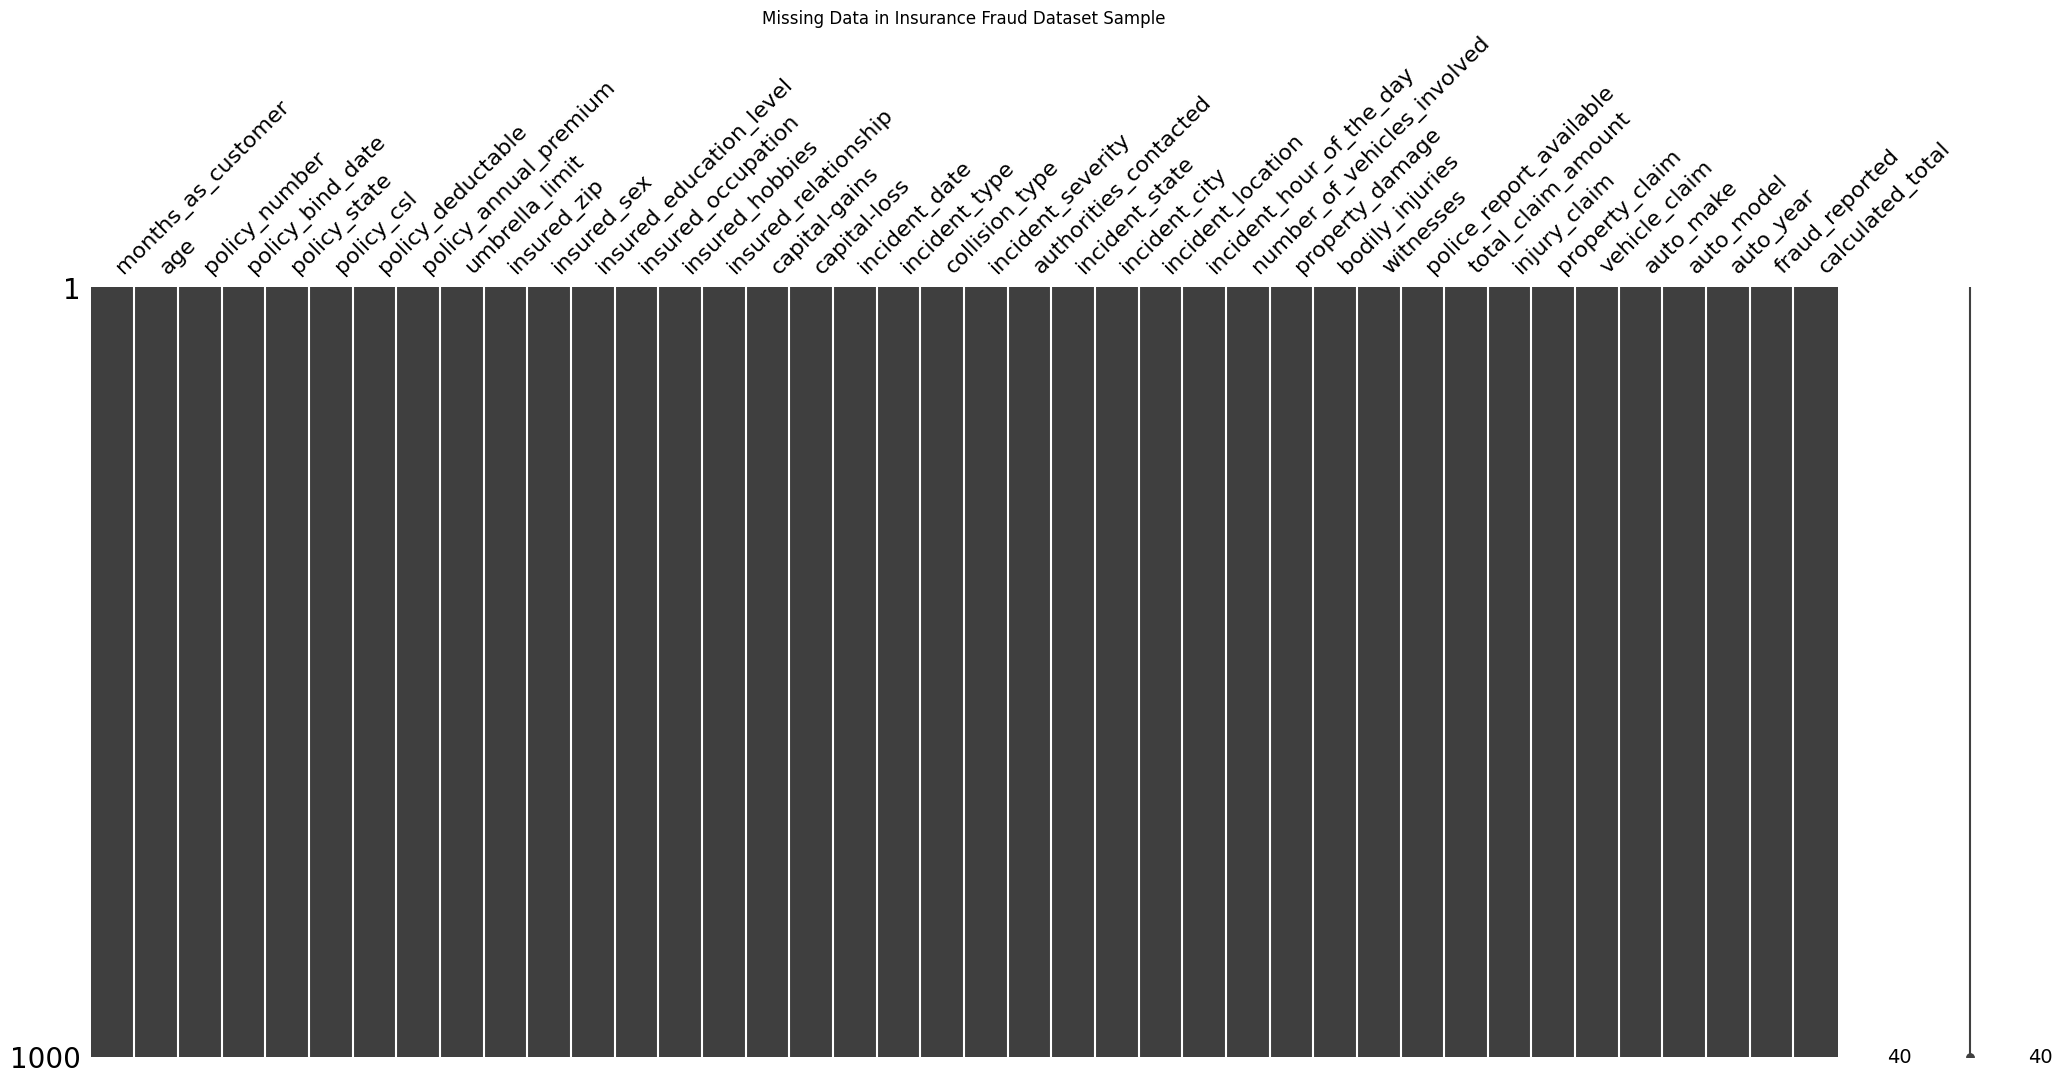

In [29]:
# Visualize missing data in Insurance Fraud Dataset
plt.figure(figsize=(12, 6))
msno.matrix(insurance_fraud_df)
plt.title('Missing Data in Insurance Fraud Dataset Sample')
plt.tight_layout()
plt.show()

## 2. Exploratory Data Analysis
<a id='2. Exploratory Data Analysis'></a>

### 2.1 Overall Fraud Statistics
<a id='2.1 Overall Fraud Statistics'></a>


OVERALL FRAUD STATISTICS
----------------------------------------
Total Claims: 1,000
Fraudulent Claims: 247 (24.7%)
Legitimate Claims: 753 (75.3%)



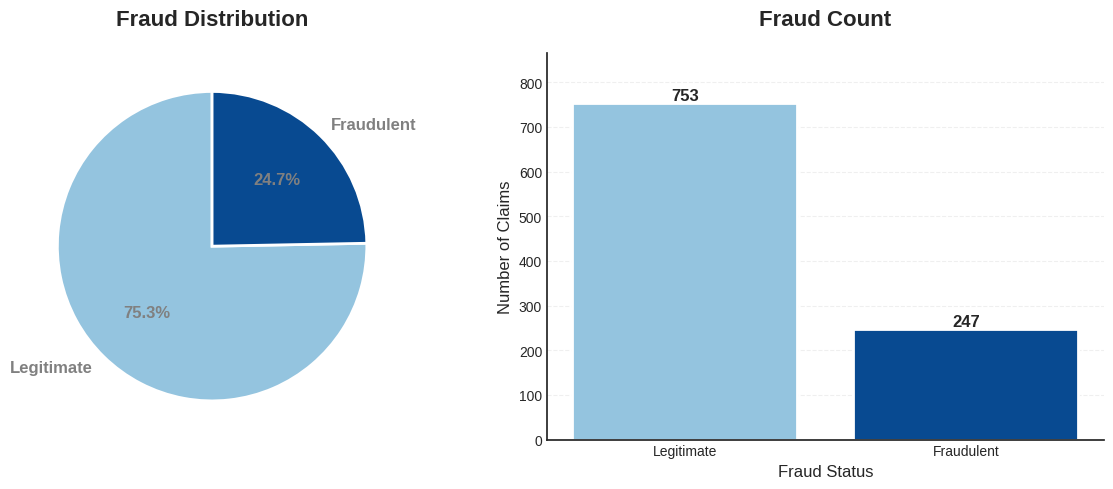

In [30]:
# Calculate overall fraud rate
fraud_counts = insurance_fraud_df['fraud_reported'].value_counts()
fraud_rate = (fraud_counts.get('Y', 0) / len(insurance_fraud_df)) * 100

print("\nOVERALL FRAUD STATISTICS")
print("-" * 40)
print(f"Total Claims: {len(insurance_fraud_df):,}")
print(f"Fraudulent Claims: {fraud_counts.get('Y', 0):,} ({fraud_rate:.1f}%)")
print(f"Legitimate Claims: {fraud_counts.get('N', 0):,} ({100-fraud_rate:.1f}%)\n")

# Set up the blue color palette
plt.style.use('seaborn-v0_8-white')
blues = plt.cm.Blues(np.linspace(0.4, 0.9, 2))

# Visualize fraud distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.patch.set_facecolor('white')

# Pie chart
ax1.pie(fraud_counts.values, labels=['Legitimate', 'Fraudulent'],
        autopct='%1.1f%%', startangle=90,
        colors=blues,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2},
        textprops={'fontsize': 12, 'weight': 'bold', 'color':'grey'})
ax1.set_title('Fraud Distribution', fontsize=16, fontweight='bold', pad=20)

# Bar chart with counts
bars = ax2.bar(['Legitimate', 'Fraudulent'], fraud_counts.values,
                color=blues,
                edgecolor='white', linewidth=2)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

ax2.set_title('Fraud Count', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Fraud Status', fontsize=12)
ax2.set_ylabel('Number of Claims', fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_ylim(0, max(fraud_counts.values) * 1.15)

plt.tight_layout()
plt.show()

### 2.2 Fraud Patterns by Incident Type
<a id='2.2 Fraud Patterns by Incident Type'></a>


FRAUD PATTERNS BY INCIDENT TYPE
----------------------------------------
fraud_reported              N    Y  fraud_rate
incident_type                                 
Single Vehicle Collision  286  117   29.032258
Multi-vehicle Collision   305  114   27.207637
Parked Car                 76    8    9.523810
Vehicle Theft              86    8    8.510638




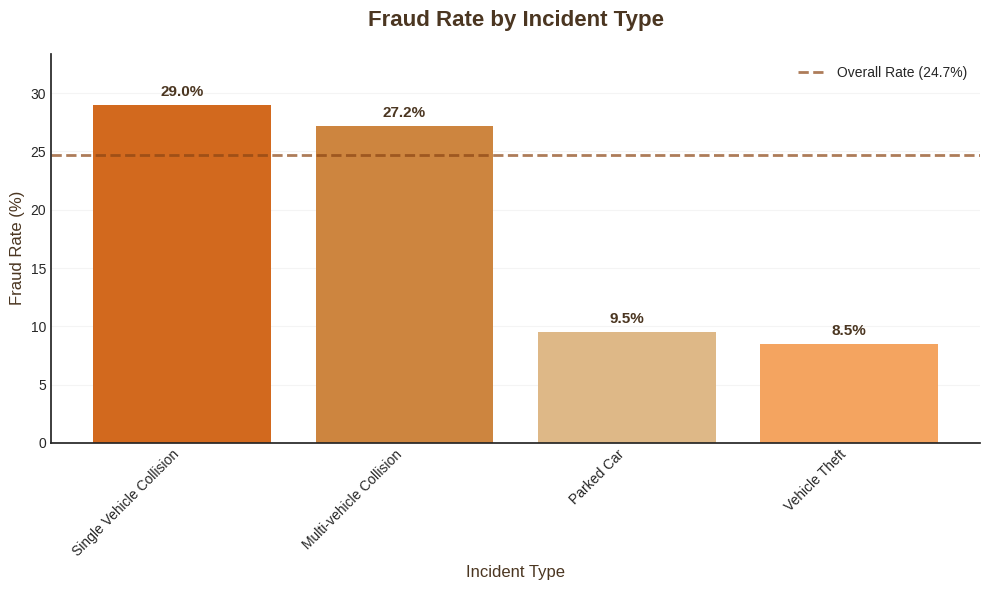

In [31]:
print("\nFRAUD PATTERNS BY INCIDENT TYPE")
print("-" * 40)

# Create crosstab of incident type vs fraud
incident_fraud = pd.crosstab(insurance_fraud_df['incident_type'],
                            insurance_fraud_df['fraud_reported'])
incident_fraud['fraud_rate'] = incident_fraud['Y'] / (incident_fraud['Y'] + incident_fraud['N']) * 100
incident_fraud_sorted = incident_fraud.sort_values('fraud_rate', ascending=False)

print(incident_fraud_sorted)
print("\n")

# Define colors
warm_colors = ['#D2691E', '#CD853F', '#DEB887', '#F4A460']  # Chocolate, Peru, BurlyWood, SandyBrown

# Visualize fraud rates by incident type
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(incident_fraud_sorted)), incident_fraud_sorted['fraud_rate'],
                color=warm_colors)

# Customize the plot
plt.title('Fraud Rate by Incident Type', fontsize=16, fontweight='bold', pad=20, color='#4B3621')
plt.xlabel('Incident Type', fontsize=12, color='#4B3621')
plt.ylabel('Fraud Rate (%)', fontsize=12, color='#4B3621')
plt.xticks(range(len(incident_fraud_sorted)), incident_fraud_sorted.index, rotation=45, ha='right')

# Add value labels on bars
for i, (idx, row) in enumerate(incident_fraud_sorted.iterrows()):
    plt.text(i, row['fraud_rate'] + 0.5, f"{row['fraud_rate']:.1f}%",
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='#4B3621')

# Add overall fraud rate line
plt.axhline(y=fraud_rate, color='#8B4513', linestyle='--', linewidth=2,
            label=f'Overall Rate ({fraud_rate:.1f}%)', alpha=0.7)

# Style the plot
plt.legend(fontsize=10)
plt.grid(True, alpha=0.2, axis='y')
plt.ylim(0, max(incident_fraud_sorted['fraud_rate']) * 1.15)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### 2.3 Fraud Patterns Time Series
<a id='2.3 Fraud Patterns Time Series'></a>


FRAUD PATTERNS TIME SERIES
----------------------------------------


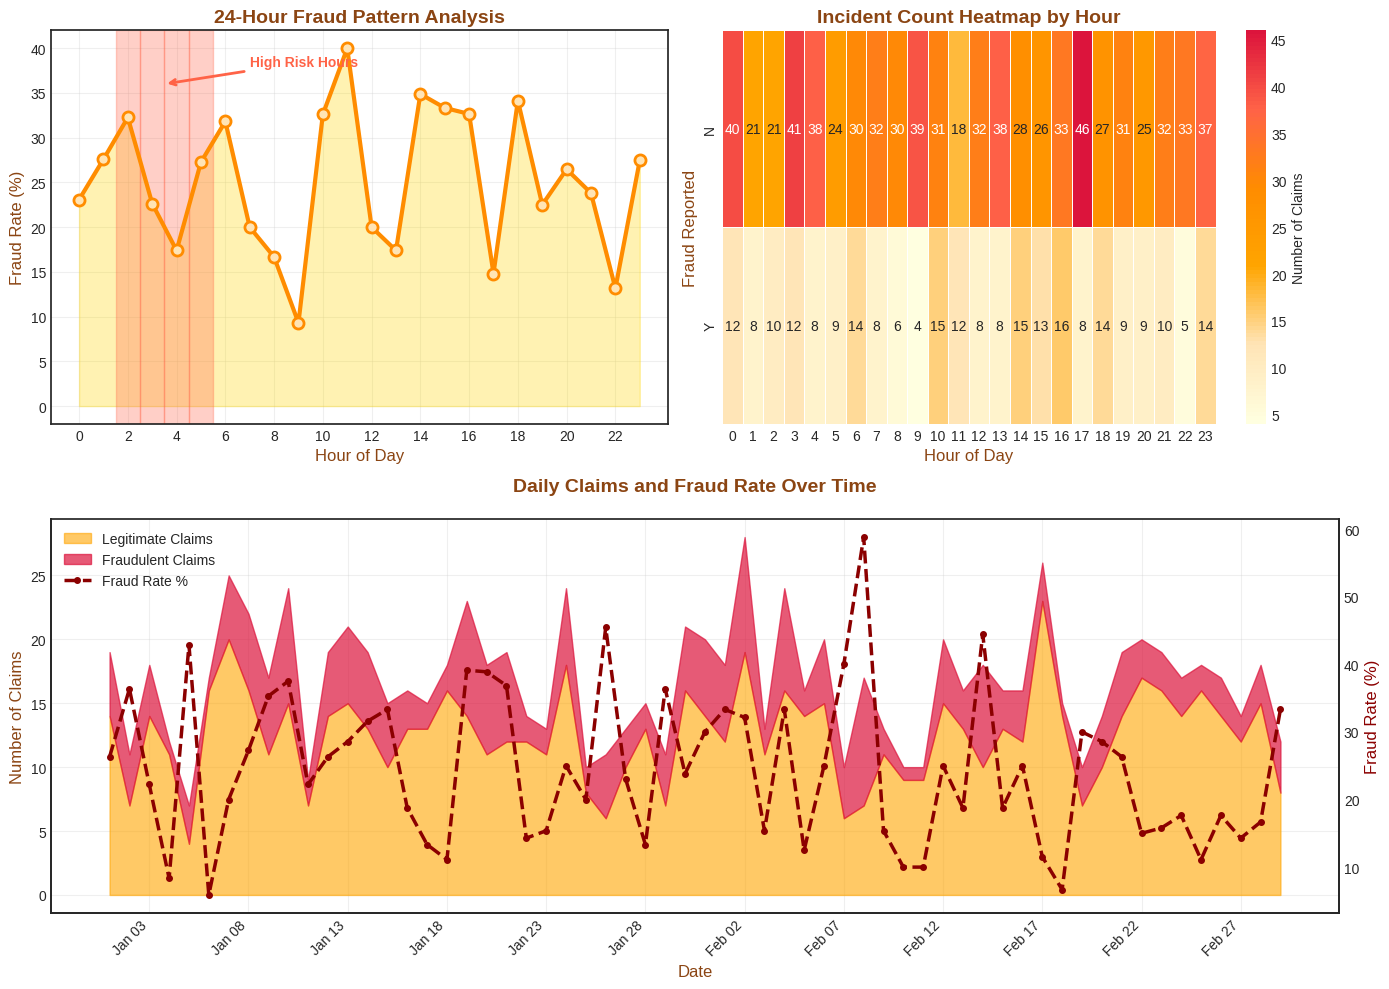


Top 5 Hours with Highest Fraud Rates:
  11:00 - 40.0% fraud rate (12.0 fraudulent claims)
  14:00 - 34.9% fraud rate (15.0 fraudulent claims)
  18:00 - 34.1% fraud rate (14.0 fraudulent claims)
  15:00 - 33.3% fraud rate (13.0 fraudulent claims)
  16:00 - 32.7% fraud rate (16.0 fraudulent claims)

4. WEEKLY FRAUD PATTERNS
----------------------------------------


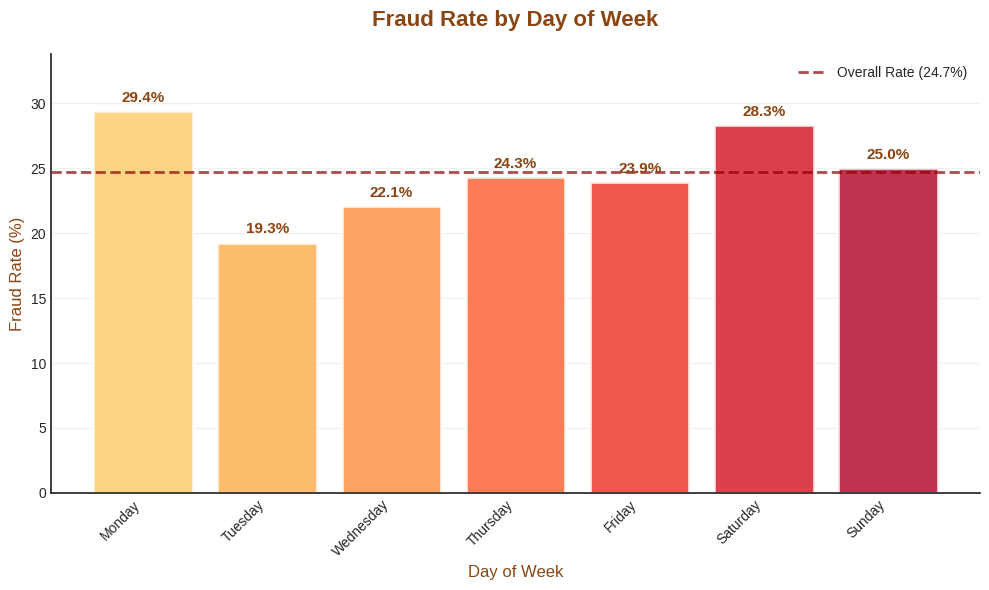


Day of Week Fraud Rates:
  Monday: 29.4%
  Tuesday: 19.3%
  Wednesday: 22.1%
  Thursday: 24.3%
  Friday: 23.9%
  Saturday: 28.3%
  Sunday: 25.0%

Temporal Insights:
  - Date range: 2015-01-01 00:00:00 to 2015-03-01 00:00:00
  - Highest daily fraud rate: 58.8% on 2015-02-08 00:00:00
  - Lowest daily fraud rate: 5.9% on 2015-01-06 00:00:00


In [52]:
print("\nFRAUD PATTERNS TIME SERIES")
print("-" * 40)

# Analyze fraud by hour of day
hour_fraud = pd.crosstab(insurance_fraud_df['incident_hour_of_the_day'],
                        insurance_fraud_df['fraud_reported'])
hour_fraud['fraud_rate'] = hour_fraud['Y'] / (hour_fraud['Y'] + hour_fraud['N']) * 100

# Create 24-hour fraud pattern visualization
fig = plt.figure(figsize=(14, 10))

# Define warm color scheme
warm_orange = '#FF8C00'  # Dark orange for main line
warm_fill = '#FFD700'    # Gold for fill
warm_highlight = '#FF6347'  # Tomato red for suspicious hours
warm_accent = '#8B4513'   # Saddle brown for text

# 1. 24-Hour Fraud Pattern Analysis
plt.subplot(2, 2, 1)
hours = list(range(24))
fraud_rates_by_hour = [hour_fraud.loc[h, 'fraud_rate'] if h in hour_fraud.index else 0 for h in hours]

plt.plot(hours, fraud_rates_by_hour, marker='o', linewidth=3, markersize=8,
         color=warm_orange, markerfacecolor='#FFE4B5', markeredgecolor=warm_orange, markeredgewidth=2)
plt.fill_between(hours, fraud_rates_by_hour, alpha=0.3, color=warm_fill)

# Highlight suspicious hours (2-5 AM)
suspicious_hours = [2, 3, 4, 5]
for hour in suspicious_hours:
    if hour < len(fraud_rates_by_hour):
        plt.axvspan(hour-0.5, hour+0.5, alpha=0.3, color=warm_highlight)

plt.xlabel('Hour of Day', fontsize=12, color=warm_accent)
plt.ylabel('Fraud Rate (%)', fontsize=12, color=warm_accent)
plt.title('24-Hour Fraud Pattern Analysis', fontsize=14, fontweight='bold', color=warm_accent)
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)

# Add annotation for suspicious hours
plt.annotate('High Risk Hours', xy=(3.5, max(fraud_rates_by_hour)*0.9),
             xytext=(7, max(fraud_rates_by_hour)*0.95),
             arrowprops=dict(arrowstyle='->', color=warm_highlight, lw=2),
             fontsize=10, color=warm_highlight, fontweight='bold')

# 2. Heatmap of incidents by hour
plt.subplot(2, 2, 2)
hour_counts = insurance_fraud_df.groupby(['incident_hour_of_the_day', 'fraud_reported']).size().unstack(fill_value=0)

# Create custom colormap from light orange to red
from matplotlib.colors import LinearSegmentedColormap
colors_warm = ['#FFFFE0', '#FFE4B5', '#FFA500', '#FF8C00', '#FF6347', '#DC143C']
n_bins = 100
cmap_warm = LinearSegmentedColormap.from_list('warm', colors_warm, N=n_bins)

sns.heatmap(hour_counts.T, cmap=cmap_warm, annot=True, fmt='d',
            cbar_kws={'label': 'Number of Claims'}, linewidths=0.5)
plt.xlabel('Hour of Day', fontsize=12, color=warm_accent)
plt.ylabel('Fraud Reported', fontsize=12, color=warm_accent)
plt.title('Incident Count Heatmap by Hour', fontsize=14, fontweight='bold', color=warm_accent)

# 3. Time Series of Fraud by Date
plt.subplot(2, 1, 2)

# Create daily fraud analysis
daily_fraud = insurance_fraud_df.groupby('incident_date').agg({
    'fraud_reported': lambda x: (x == 'Y').sum(),
    'policy_number': 'count'
}).rename(columns={'fraud_reported': 'fraud_count', 'policy_number': 'total_claims'})

daily_fraud['fraud_rate'] = (daily_fraud['fraud_count'] / daily_fraud['total_claims']) * 100
daily_fraud['legitimate_count'] = daily_fraud['total_claims'] - daily_fraud['fraud_count']

# Plot time series
ax = plt.gca()
dates = daily_fraud.index

# Plot fraud and legitimate claims as stacked area
plt.fill_between(dates, 0, daily_fraud['legitimate_count'],
                 color='#FFA500', alpha=0.6, label='Legitimate Claims')
plt.fill_between(dates, daily_fraud['legitimate_count'], daily_fraud['total_claims'],
                 color='#DC143C', alpha=0.7, label='Fraudulent Claims')

# Add trend line for fraud rate
ax2 = ax.twinx()
ax2.plot(dates, daily_fraud['fraud_rate'], color='#8B0000', linewidth=2.5,
         marker='o', markersize=4, label='Fraud Rate %', linestyle='--')

# Formatting
ax.set_xlabel('Date', fontsize=12, color=warm_accent)
ax.set_ylabel('Number of Claims', fontsize=12, color=warm_accent)
ax2.set_ylabel('Fraud Rate (%)', fontsize=12, color='#8B0000')
ax.set_title('Daily Claims and Fraud Rate Over Time', fontsize=14, fontweight='bold', color=warm_accent, pad=20)

# Format x-axis dates
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

# Grid
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

# Identify peak fraud hours
top_fraud_hours = hour_fraud.nlargest(5, 'fraud_rate')
print("\nTop 5 Hours with Highest Fraud Rates:")
for hour, row in top_fraud_hours.iterrows():
    print(f"  {hour:02d}:00 - {row['fraud_rate']:.1f}% fraud rate ({row['Y']} fraudulent claims)")

# Add weekly pattern analysis
print("\n4. WEEKLY FRAUD PATTERNS")
print("-" * 40)

# Extract day of week from incident_date
insurance_fraud_df['day_of_week'] = pd.to_datetime(insurance_fraud_df['incident_date']).dt.day_name()
insurance_fraud_df['day_number'] = pd.to_datetime(insurance_fraud_df['incident_date']).dt.dayofweek

# Analyze fraud by day of week
dow_fraud = pd.crosstab(insurance_fraud_df['day_of_week'],
                       insurance_fraud_df['fraud_reported'])
dow_fraud['fraud_rate'] = dow_fraud['Y'] / (dow_fraud['Y'] + dow_fraud['N']) * 100

# Order days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_fraud = dow_fraud.reindex(day_order)

# Create day of week visualization
plt.figure(figsize=(10, 6))

# Create gradient colors for days
day_colors = plt.cm.YlOrRd(np.linspace(0.3, 0.9, 7))

bars = plt.bar(range(7), dow_fraud['fraud_rate'], color=day_colors,
                edgecolor='white', linewidth=2, alpha=0.8)

plt.xlabel('Day of Week', fontsize=12, color=warm_accent)
plt.ylabel('Fraud Rate (%)', fontsize=12, color=warm_accent)
plt.title('Fraud Rate by Day of Week', fontsize=16, fontweight='bold', color=warm_accent, pad=20)
plt.xticks(range(7), day_order, rotation=45, ha='right')

# Add value labels
for i, rate in enumerate(dow_fraud['fraud_rate']):
    plt.text(i, rate + 0.5, f'{rate:.1f}%', ha='center', va='bottom',
             fontsize=11, fontweight='bold', color=warm_accent)

# Add average line
plt.axhline(y=fraud_rate, color='#8B0000', linestyle='--', linewidth=2,
            label=f'Overall Rate ({fraud_rate:.1f}%)', alpha=0.7)

plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, max(dow_fraud['fraud_rate']) * 1.15)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

print("\nDay of Week Fraud Rates:")
for day in day_order:
    print(f"  {day}: {dow_fraud.loc[day, 'fraud_rate']:.1f}%")

# Summary statistics
print(f"\nTemporal Insights:")
print(f"  - Date range: {insurance_fraud_df['incident_date'].min()} to {insurance_fraud_df['incident_date'].max()}")
print(f"  - Highest daily fraud rate: {daily_fraud['fraud_rate'].max():.1f}% on {daily_fraud['fraud_rate'].idxmax()}")
print(f"  - Lowest daily fraud rate: {daily_fraud['fraud_rate'].min():.1f}% on {daily_fraud['fraud_rate'].idxmin()}")

### 2.4 Financial Analysis of Fraudulent Claims
<a id='2.4 Financial Analysis of Fraudulent Claims'></a>


FINANCIAL ANALYSIS
----------------------------------------
Average Total Claim Amount:
  Fraudulent: $60,302.11
  Legitimate: $50,288.61
  Difference: 19.9% higher



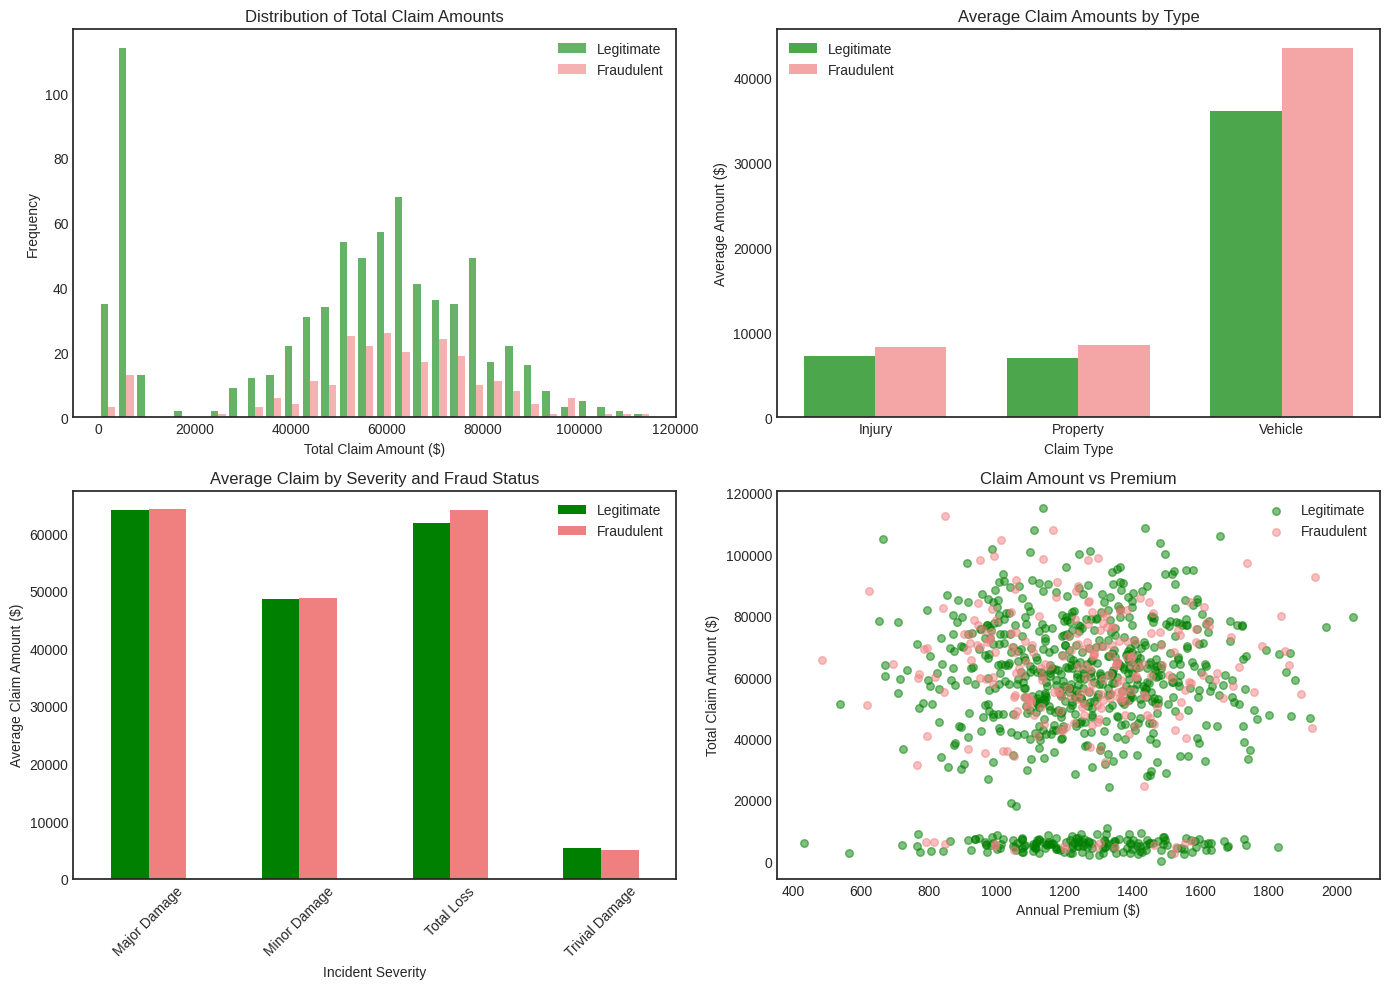

In [33]:
print("\nFINANCIAL ANALYSIS")
print("-" * 40)

# Compare claim amounts between fraudulent and legitimate claims
fraud_claims = insurance_fraud_df[insurance_fraud_df['fraud_reported'] == 'Y']
legit_claims = insurance_fraud_df[insurance_fraud_df['fraud_reported'] == 'N']

print(f"Average Total Claim Amount:")
print(f"  Fraudulent: ${fraud_claims['total_claim_amount'].mean():,.2f}")
print(f"  Legitimate: ${legit_claims['total_claim_amount'].mean():,.2f}")
print(f"  Difference: {((fraud_claims['total_claim_amount'].mean() / legit_claims['total_claim_amount'].mean()) - 1) * 100:.1f}% higher\n")

# Visualize claim distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Total claim distribution
axes[0, 0].hist([legit_claims['total_claim_amount'], fraud_claims['total_claim_amount']],
                bins=30, alpha=0.6, label=['Legitimate', 'Fraudulent'], color=['green', 'lightcoral'])
axes[0, 0].set_xlabel('Total Claim Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Total Claim Amounts')
axes[0, 0].legend()

# Breakdown by claim type
claim_types = ['injury_claim', 'property_claim', 'vehicle_claim']
fraud_means = [fraud_claims[ct].mean() for ct in claim_types]
legit_means = [legit_claims[ct].mean() for ct in claim_types]

x = np.arange(len(claim_types))
width = 0.35

axes[0, 1].bar(x - width/2, legit_means, width, label='Legitimate', color='green', alpha=0.7)
axes[0, 1].bar(x + width/2, fraud_means, width, label='Fraudulent', color='lightcoral', alpha=0.7)
axes[0, 1].set_xlabel('Claim Type')
axes[0, 1].set_ylabel('Average Amount ($)')
axes[0, 1].set_title('Average Claim Amounts by Type')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['Injury', 'Property', 'Vehicle'])
axes[0, 1].legend()

# Claim amount vs incident severity
severity_fraud = insurance_fraud_df.groupby(['incident_severity', 'fraud_reported'])['total_claim_amount'].mean().unstack()
severity_fraud.plot(kind='bar', ax=axes[1, 0], color=['green', 'lightcoral'])
axes[1, 0].set_xlabel('Incident Severity')
axes[1, 0].set_ylabel('Average Claim Amount ($)')
axes[1, 0].set_title('Average Claim by Severity and Fraud Status')
axes[1, 0].legend(['Legitimate', 'Fraudulent'])
axes[1, 0].tick_params(axis='x', rotation=45)

# Policy premium vs fraud
axes[1, 1].scatter(legit_claims['policy_annual_premium'], legit_claims['total_claim_amount'],
                   alpha=0.5, color='green', label='Legitimate', s=30)
axes[1, 1].scatter(fraud_claims['policy_annual_premium'], fraud_claims['total_claim_amount'],
                   alpha=0.5, color='lightcoral', label='Fraudulent', s=30)
axes[1, 1].set_xlabel('Annual Premium ($)')
axes[1, 1].set_ylabel('Total Claim Amount ($)')
axes[1, 1].set_title('Claim Amount vs Premium')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


### 2.5 Behavioral Indicators of Fraud
<a id='2.5 Behavioral Indicators of Fraud'></a>


BEHAVIORAL INDICATORS
----------------------------------------

Police Report Availability (% within fraud category):
fraud_reported                   N          Y
police_report_available                      
NO                       34.130146  34.817814
Unknown                  33.731740  36.032389
YES                      32.138114  29.149798

Authorities Contacted (% within fraud category):
fraud_reported            N     Y
authorities_contacted            
Ambulance              18.5  23.1
Fire                   21.6  24.3
None                   11.3   2.4
Other                  17.9  25.5
Police                 30.7  24.7




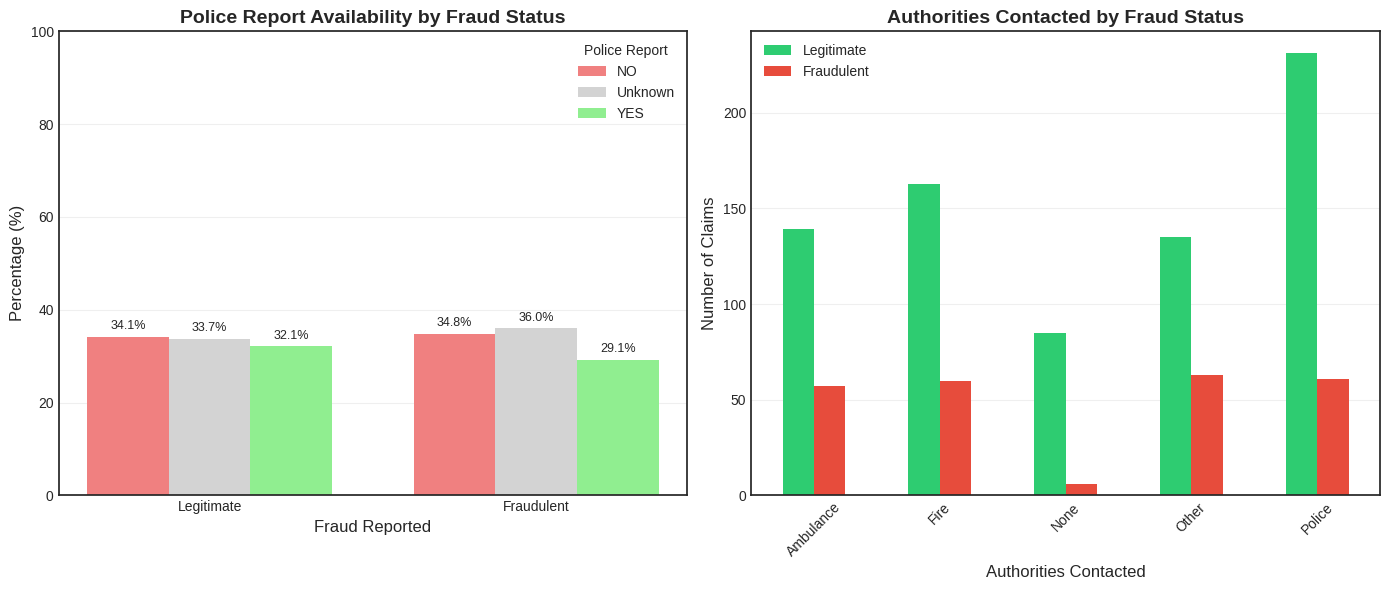

In [34]:
print("\nBEHAVIORAL INDICATORS")
print("-" * 40)

# Police report availability
police_fraud = pd.crosstab(insurance_fraud_df['police_report_available'],
                          insurance_fraud_df['fraud_reported'], normalize='columns') * 100
print("\nPolice Report Availability (% within fraud category):")
print(police_fraud)

# Authorities contacted
auth_fraud = pd.crosstab(insurance_fraud_df['authorities_contacted'],
                        insurance_fraud_df['fraud_reported'], normalize='columns') * 100
print("\nAuthorities Contacted (% within fraud category):")
print(auth_fraud.round(1))
print("\n")

# Visualize behavioral patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('white')

# Define color mapping for police report status
police_colors = {
    'NO': 'lightcoral',
    'Unknown': 'lightgrey',
    'YES': 'lightgreen'
}

police_order = ['NO', 'Unknown', 'YES']
police_fraud_ordered = police_fraud.reindex(police_order)

# Create the grouped bar chart with correct colors
x = np.arange(2)  # Two groups: Legitimate (N) and Fraudulent (Y)
width = 0.25

for i, status in enumerate(police_order):
    values = police_fraud_ordered.loc[status]
    ax1.bar(x + i*width, values, width, label=status, color=police_colors[status])

ax1.set_title('Police Report Availability by Fraud Status', fontsize=14, fontweight='bold')
ax1.set_xlabel('Fraud Reported', fontsize=12)
ax1.set_ylabel('Percentage (%)', fontsize=12)
ax1.set_xticks(x + width)
ax1.set_xticklabels(['Legitimate', 'Fraudulent'])
ax1.legend(title='Police Report', loc='upper right')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0, 100)

# Add value labels on bars
for i, status in enumerate(police_order):
    values = police_fraud_ordered.loc[status]
    for j, val in enumerate(values):
        ax1.text(j + i*width, val + 1, f'{val:.1f}%',
                ha='center', va='bottom', fontsize=9)

# Authorities contacted patterns (keep as is)
auth_counts = pd.crosstab(insurance_fraud_df['authorities_contacted'],
                         insurance_fraud_df['fraud_reported'])
auth_counts.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c'])
ax2.set_title('Authorities Contacted by Fraud Status', fontsize=14, fontweight='bold')
ax2.set_xlabel('Authorities Contacted', fontsize=12)
ax2.set_ylabel('Number of Claims', fontsize=12)
ax2.legend(['Legitimate', 'Fraudulent'])
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 2.6 Customer Profile Analysis
<a id='2.6 Customer Profile Analysis'></a>


CUSTOMER PROFILE ANALYSIS
----------------------------------------


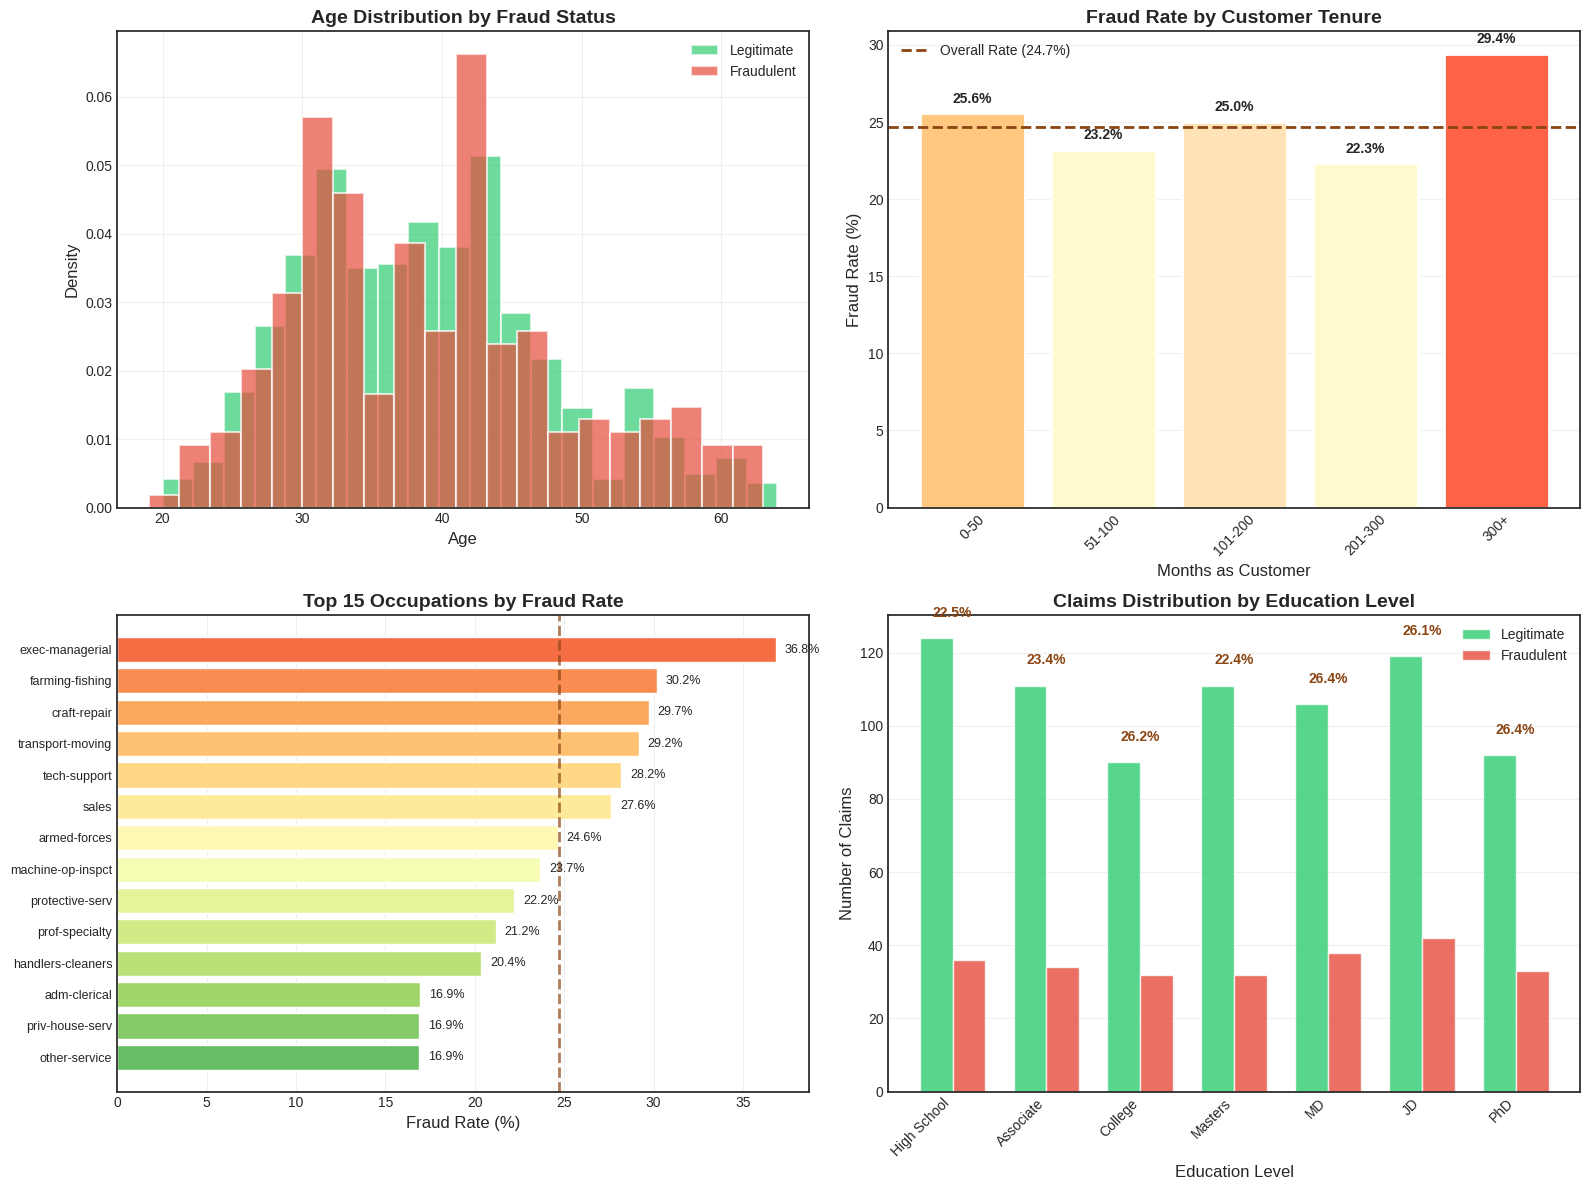


OCCUPATION ANALYSIS:
Highest fraud rate occupation: exec-managerial (36.8%)
Lowest fraud rate occupation: other-service (16.9%)

EDUCATION LEVEL ANALYSIS:
High School: 22.5% fraud rate (36/160 claims)
Associate: 23.4% fraud rate (34/145 claims)
College: 26.2% fraud rate (32/122 claims)
Masters: 22.4% fraud rate (32/143 claims)
MD: 26.4% fraud rate (38/144 claims)
JD: 26.1% fraud rate (42/161 claims)
PhD: 26.4% fraud rate (33/125 claims)

7. OCCUPATION-EDUCATION FRAUD PATTERNS
----------------------------------------


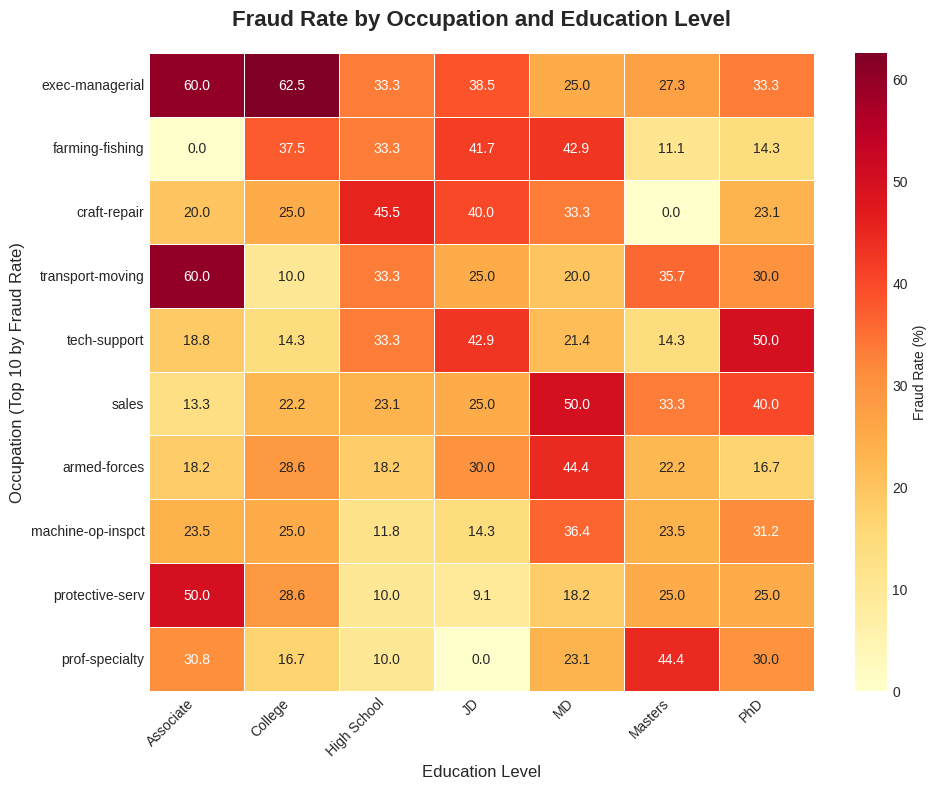

In [42]:
print("\nCUSTOMER PROFILE ANALYSIS")
print("-" * 40)

# Create a 2x2 subplot layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('white')

# 1. Age distribution by fraud status
legit_claims['age'].hist(bins=20, alpha=0.7, color='#2ecc71', label='Legitimate',
                         density=True, edgecolor='white', linewidth=1.5, ax=ax1)
fraud_claims['age'].hist(bins=20, alpha=0.7, color='#e74c3c', label='Fraudulent',
                         density=True, edgecolor='white', linewidth=1.5, ax=ax1)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('Age Distribution by Fraud Status', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Customer tenure analysis with warm gradient
tenure_bins = [0, 50, 100, 200, 300, 500]
tenure_labels = ['0-50', '51-100', '101-200', '201-300', '300+']
insurance_fraud_df['tenure_group'] = pd.cut(insurance_fraud_df['months_as_customer'],
                                           bins=tenure_bins, labels=tenure_labels)
tenure_fraud = pd.crosstab(insurance_fraud_df['tenure_group'],
                          insurance_fraud_df['fraud_reported'])
tenure_fraud_rate = tenure_fraud['Y'] / (tenure_fraud['Y'] + tenure_fraud['N']) * 100

# Create warm gradient colors based on fraud rate
from matplotlib.colors import LinearSegmentedColormap
warm_colors = ['#FFFACD', '#FFE4B5', '#FFDAB9', '#FFB347', '#FF8C00', '#FF6347']
n_bins = len(tenure_fraud_rate)
cmap_warm = LinearSegmentedColormap.from_list('warm_gradient', warm_colors, N=n_bins)

# Normalize fraud rates for color mapping
norm = plt.Normalize(vmin=min(tenure_fraud_rate), vmax=max(tenure_fraud_rate))
bar_colors = [cmap_warm(norm(rate)) for rate in tenure_fraud_rate]

bars = ax2.bar(range(len(tenure_fraud_rate)), tenure_fraud_rate, color=bar_colors,
                edgecolor='white', linewidth=2)

ax2.set_xlabel('Months as Customer', fontsize=12)
ax2.set_ylabel('Fraud Rate (%)', fontsize=12)
ax2.set_title('Fraud Rate by Customer Tenure', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(tenure_labels)))
ax2.set_xticklabels(tenure_labels, rotation=45)
ax2.axhline(y=fraud_rate, color='#8B4513', linestyle='--', linewidth=2,
            label=f'Overall Rate ({fraud_rate:.1f}%)')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, rate) in enumerate(zip(bars, tenure_fraud_rate)):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{rate:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. Occupation distribution by fraud status
occ_fraud = pd.crosstab(insurance_fraud_df['insured_occupation'],
                       insurance_fraud_df['fraud_reported'])
occ_fraud['fraud_rate'] = occ_fraud['Y'] / (occ_fraud['Y'] + occ_fraud['N']) * 100
occ_fraud_sorted = occ_fraud.sort_values('fraud_rate', ascending=True).tail(15)  # Top 15 occupations

# Create horizontal bar chart
y_pos = np.arange(len(occ_fraud_sorted))
colors_occ = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(occ_fraud_sorted)))

bars = ax3.barh(y_pos, occ_fraud_sorted['fraud_rate'], color=colors_occ,
                 edgecolor='white', linewidth=1)

ax3.set_yticks(y_pos)
ax3.set_yticklabels(occ_fraud_sorted.index, fontsize=9)
ax3.set_xlabel('Fraud Rate (%)', fontsize=12)
ax3.set_title('Top 15 Occupations by Fraud Rate', fontsize=14, fontweight='bold')
ax3.axvline(x=fraud_rate, color='#8B4513', linestyle='--', linewidth=2, alpha=0.7)
ax3.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, row) in enumerate(occ_fraud_sorted.iterrows()):
    ax3.text(row['fraud_rate'] + 0.5, i, f"{row['fraud_rate']:.1f}%",
             va='center', fontsize=9)

# 4. Educational level by fraud status
edu_order = ['High School', 'Associate', 'College', 'Masters', 'MD', 'JD', 'PhD']
edu_fraud = pd.crosstab(insurance_fraud_df['insured_education_level'],
                       insurance_fraud_df['fraud_reported'])
edu_fraud['total'] = edu_fraud.sum(axis=1)
edu_fraud['fraud_rate'] = edu_fraud['Y'] / edu_fraud['total'] * 100

# Reorder based on education hierarchy
edu_fraud_ordered = edu_fraud.reindex([e for e in edu_order if e in edu_fraud.index])

# Create grouped bar chart
x = np.arange(len(edu_fraud_ordered))
width = 0.35

bars1 = ax4.bar(x - width/2, edu_fraud_ordered['N'], width, label='Legitimate',
                color='#2ecc71', alpha=0.8, edgecolor='white', linewidth=1)
bars2 = ax4.bar(x + width/2, edu_fraud_ordered['Y'], width, label='Fraudulent',
                color='#e74c3c', alpha=0.8, edgecolor='white', linewidth=1)

ax4.set_xlabel('Education Level', fontsize=12)
ax4.set_ylabel('Number of Claims', fontsize=12)
ax4.set_title('Claims Distribution by Education Level', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(edu_fraud_ordered.index, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Add fraud rate as text above bars
for i, (idx, row) in enumerate(edu_fraud_ordered.iterrows()):
    # Position text above the higher bar
    max_height = max(row['N'], row['Y'])
    ax4.text(i, max_height + 5, f"{row['fraud_rate']:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='#8B4513')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nOCCUPATION ANALYSIS:")
print(f"Highest fraud rate occupation: {occ_fraud.idxmax()['fraud_rate']} ({occ_fraud.max()['fraud_rate']:.1f}%)")
print(f"Lowest fraud rate occupation: {occ_fraud.idxmin()['fraud_rate']} ({occ_fraud.min()['fraud_rate']:.1f}%)")

print("\nEDUCATION LEVEL ANALYSIS:")
for edu in edu_fraud_ordered.index:
    print(f"{edu}: {edu_fraud_ordered.loc[edu, 'fraud_rate']:.1f}% fraud rate "
          f"({edu_fraud_ordered.loc[edu, 'Y']}/{edu_fraud_ordered.loc[edu, 'total']} claims)")

# Create a heatmap of occupation vs education fraud patterns
print("\n7. OCCUPATION-EDUCATION FRAUD PATTERNS")
print("-" * 40)

# Create pivot table
occ_edu_fraud = pd.crosstab([insurance_fraud_df['insured_occupation'],
                            insurance_fraud_df['insured_education_level']],
                           insurance_fraud_df['fraud_reported'])
occ_edu_fraud['fraud_rate'] = occ_edu_fraud['Y'] / (occ_edu_fraud['Y'] + occ_edu_fraud['N']) * 100

# Select top occupations for readability
top_occupations = occ_fraud.nlargest(10, 'fraud_rate').index
occ_edu_pivot = occ_edu_fraud.loc[top_occupations]['fraud_rate'].unstack(fill_value=0)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(occ_edu_pivot, annot=True, fmt='.1f', cmap='YlOrRd',
            cbar_kws={'label': 'Fraud Rate (%)'}, linewidths=0.5)
plt.title('Fraud Rate by Occupation and Education Level', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Occupation (Top 10 by Fraud Rate)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2.7 Vehicle Analysis
<a id='2.7 Vehicle Analysis'></a>


VEHICLE ANALYSIS
----------------------------------------
Top 10 Auto Makes by Fraud Rate:
  Mercedes: 33.8% (22.0/65.0 claims)
  Ford: 30.6% (22.0/72.0 claims)
  Audi: 30.4% (21.0/69.0 claims)
  Volkswagen: 27.9% (19.0/68.0 claims)
  BMW: 27.8% (20.0/72.0 claims)
  Chevrolet: 27.6% (21.0/76.0 claims)
  Honda: 25.5% (14.0/55.0 claims)
  Dodge: 25.0% (20.0/80.0 claims)
  Subaru: 23.8% (19.0/80.0 claims)
  Saab: 22.5% (18.0/80.0 claims)




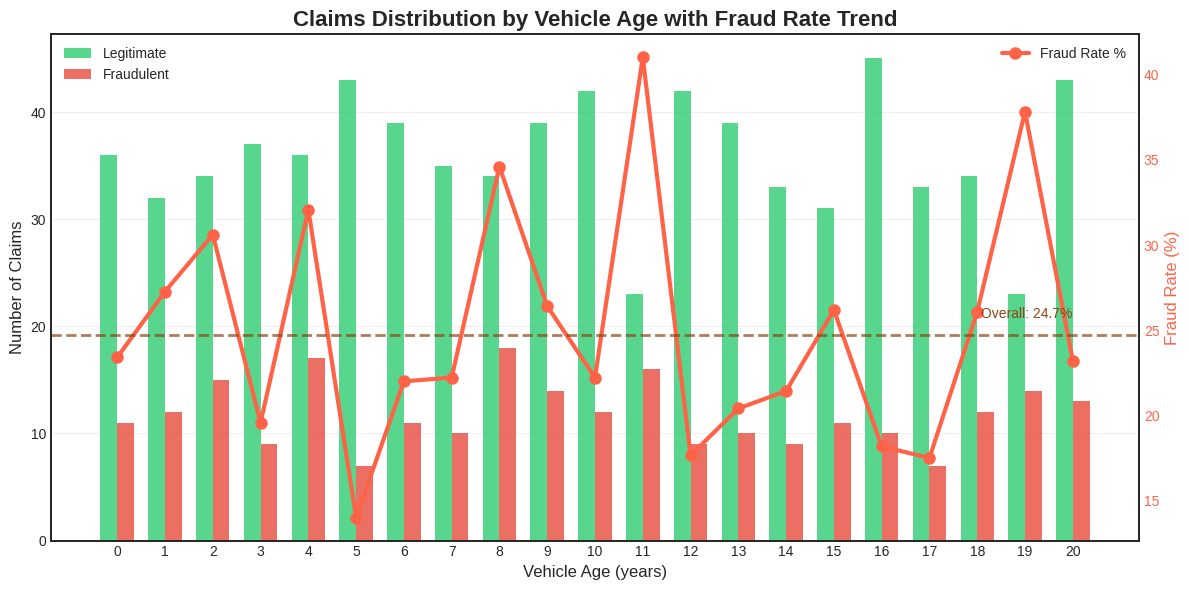


VEHICLE DISTRIBUTION TREEMAP
----------------------------------------



VEHICLE MAKE SUMMARY:
            Fraud Rate (%)  Avg Claim ($)  Total Claims
auto_make                                              
Mercedes             33.85       52372.15            65
Ford                 30.56       56570.14            72
Audi                 30.43       54383.77            69
Volkswagen           27.94       50854.85            68
BMW                  27.78       55905.28            72
Chevrolet            27.63       52746.58            76
Honda                25.45       51714.91            55
Dodge                25.00       55944.38            80
Subaru               23.75       53730.12            80
Saab                 22.50       51445.38            80

HIGH-RISK VEHICLE COMBINATIONS:

Vehicles with fraud rate > 37.0% (1.5x overall rate):
  BMW X6: 43.8% (7.0/16.0 claims)
  Chevrolet Silverado: 40.9% (9.0/22.0 claims)
  Mercedes ML350: 40.0% (8.0/20.0 claims)
  Mercedes C300: 38.9% (7.0/18.0 claims)
  Chevrolet Tahoe: 37.5% (9.0/24.0 claims)


In [45]:
print("\nVEHICLE ANALYSIS")
print("-" * 40)

# Top 10 auto makes by fraud rate
make_fraud = pd.crosstab(insurance_fraud_df['auto_make'],
                        insurance_fraud_df['fraud_reported'])
make_fraud['total'] = make_fraud.sum(axis=1)
make_fraud['fraud_rate'] = make_fraud['Y'] / make_fraud['total'] * 100
make_fraud_top = make_fraud.nlargest(10, 'fraud_rate')

print("Top 10 Auto Makes by Fraud Rate:")
for make, row in make_fraud_top.iterrows():
    print(f"  {make}: {row['fraud_rate']:.1f}% ({row['Y']}/{row['total']} claims)")
print("\n")

fig, ax1 = plt.subplots(figsize=(12, 6))

vehicle_age_fraud = insurance_fraud_df.groupby(['vehicle_age', 'fraud_reported']).size().unstack(fill_value=0)
vehicle_age_fraud['fraud_rate'] = vehicle_age_fraud['Y'] / (vehicle_age_fraud['Y'] + vehicle_age_fraud['N']) * 100

# Create grouped bar chart
x = vehicle_age_fraud.index
width = 0.35
x_pos = np.arange(len(x))

bars1 = ax1.bar(x_pos - width/2, vehicle_age_fraud['N'], width,
                label='Legitimate', color='#2ecc71', alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, vehicle_age_fraud['Y'], width,
                label='Fraudulent', color='#e74c3c', alpha=0.8)

ax1.set_xlabel('Vehicle Age (years)', fontsize=12)
ax1.set_ylabel('Number of Claims', fontsize=12)
ax1.set_title('Claims Distribution by Vehicle Age with Fraud Rate Trend', fontsize=16, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3, axis='y')

# Add fraud rate line on secondary axis
ax2 = ax1.twinx()
ax2.plot(x_pos, vehicle_age_fraud['fraud_rate'], 'o-', color='#FF6347',
         linewidth=3, markersize=8, label='Fraud Rate %')
ax2.set_ylabel('Fraud Rate (%)', fontsize=12, color='#FF6347')
ax2.tick_params(axis='y', labelcolor='#FF6347')

# Add overall fraud rate reference line
ax2.axhline(y=fraud_rate, color='#8B4513', linestyle='--', linewidth=2, alpha=0.7)
ax2.text(len(x_pos)-1, fraud_rate+1, f'Overall: {fraud_rate:.1f}%',
         ha='right', fontsize=10, color='#8B4513')

ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Create Treemap of Vehicle Distribution by Make, Model, and Fraud Status
print("\nVEHICLE DISTRIBUTION TREEMAP")
print("-" * 40)

import plotly.express as px
import plotly.graph_objects as go

# Prepare hierarchical data for treemap
treemap_data = insurance_fraud_df.groupby(['auto_make', 'auto_model', 'fraud_reported']).size().reset_index(name='count')

# Add percentage within each make-model combination
make_model_totals = treemap_data.groupby(['auto_make', 'auto_model'])['count'].sum()
treemap_data['total_per_model'] = treemap_data.apply(
    lambda row: make_model_totals[(row['auto_make'], row['auto_model'])], axis=1)
treemap_data['percentage'] = (treemap_data['count'] / treemap_data['total_per_model'] * 100).round(1)

# Create labels with count and percentage
treemap_data['label'] = treemap_data.apply(
    lambda row: f"{row['auto_model']}<br>{'Fraud' if row['fraud_reported'] == 'Y' else 'Legit'}: {row['count']} ({row['percentage']}%)",
    axis=1)

# Add root level
treemap_data['all'] = 'All Vehicles'

# Create color mapping - red shades for fraud, green shades for legitimate
treemap_data['color_value'] = treemap_data['fraud_reported'].map({'Y': 1, 'N': 0})

# Create the treemap
fig = px.treemap(
    treemap_data,
    path=['all', 'auto_make', 'auto_model', 'fraud_reported'],
    values='count',
    title='Vehicle Distribution by Make, Model, and Fraud Status',
    color='color_value',
    color_continuous_scale=['#2ecc71', '#e74c3c'],  # Green for legitimate, Red for fraud
    hover_data={'count': ':,', 'percentage': ':.1f'},
    labels={'color_value': 'Fraud Status', 'count': 'Number of Claims'},
)

# Update layout
fig.update_traces(
    textinfo="label+value",
    textfont_size=12,
    marker=dict(line=dict(width=2, color='white')),
    hovertemplate='<b>%{label}</b><br>Claims: %{value}<br>Percentage: %{customdata[1]:.1f}%<extra></extra>'
)

fig.update_layout(
    width=1200,
    height=800,
    font=dict(size=14),
    title_font_size=20,
    title_x=0.5,
    coloraxis_colorbar=dict(
        title="Fraud Status",
        tickvals=[0, 1],
        ticktext=["Legitimate", "Fraudulent"],
        lenmode="fraction",
        len=0.5,
    )
)

fig.show()


# Summary statistics by make
print("\nVEHICLE MAKE SUMMARY:")
make_summary = insurance_fraud_df.groupby('auto_make').agg({
    'fraud_reported': lambda x: (x == 'Y').mean() * 100,
    'total_claim_amount': 'mean',
    'policy_number': 'count'
}).round(2)
make_summary.columns = ['Fraud Rate (%)', 'Avg Claim ($)', 'Total Claims']
print(make_summary.sort_values('Fraud Rate (%)', ascending=False).head(10))

# High-risk vehicle combinations
print("\nHIGH-RISK VEHICLE COMBINATIONS:")
vehicle_combo = insurance_fraud_df.groupby(['auto_make', 'auto_model']).agg({
    'fraud_reported': lambda x: (x == 'Y').sum(),
    'policy_number': 'count'
}).rename(columns={'fraud_reported': 'fraud_count', 'policy_number': 'total'})

vehicle_combo['fraud_rate'] = (vehicle_combo['fraud_count'] / vehicle_combo['total'] * 100).round(1)
high_risk_vehicles = vehicle_combo[vehicle_combo['fraud_rate'] > fraud_rate * 1.5].sort_values('fraud_rate', ascending=False)

print(f"\nVehicles with fraud rate > {fraud_rate * 1.5:.1f}% (1.5x overall rate):")
for (make, model), row in high_risk_vehicles.head(10).iterrows():
    print(f"  {make} {model}: {row['fraud_rate']:.1f}% ({row['fraud_count']}/{row['total']} claims)")


### 2.8 Geographic Fraud Analysis
<a id='2.8 Geographic Fraud Analysis'></a>


Fraud Statistics by State:
----------------------------------------
OH: 43.5% fraud rate (10/23 claims)
NC: 30.9% fraud rate (34/110 claims)
SC: 29.4% fraud rate (73/248 claims)
PA: 26.7% fraud rate (8/30 claims)
VA: 22.7% fraud rate (25/110 claims)
NY: 22.1% fraud rate (58/262 claims)
WV: 18.0% fraud rate (39/217 claims)


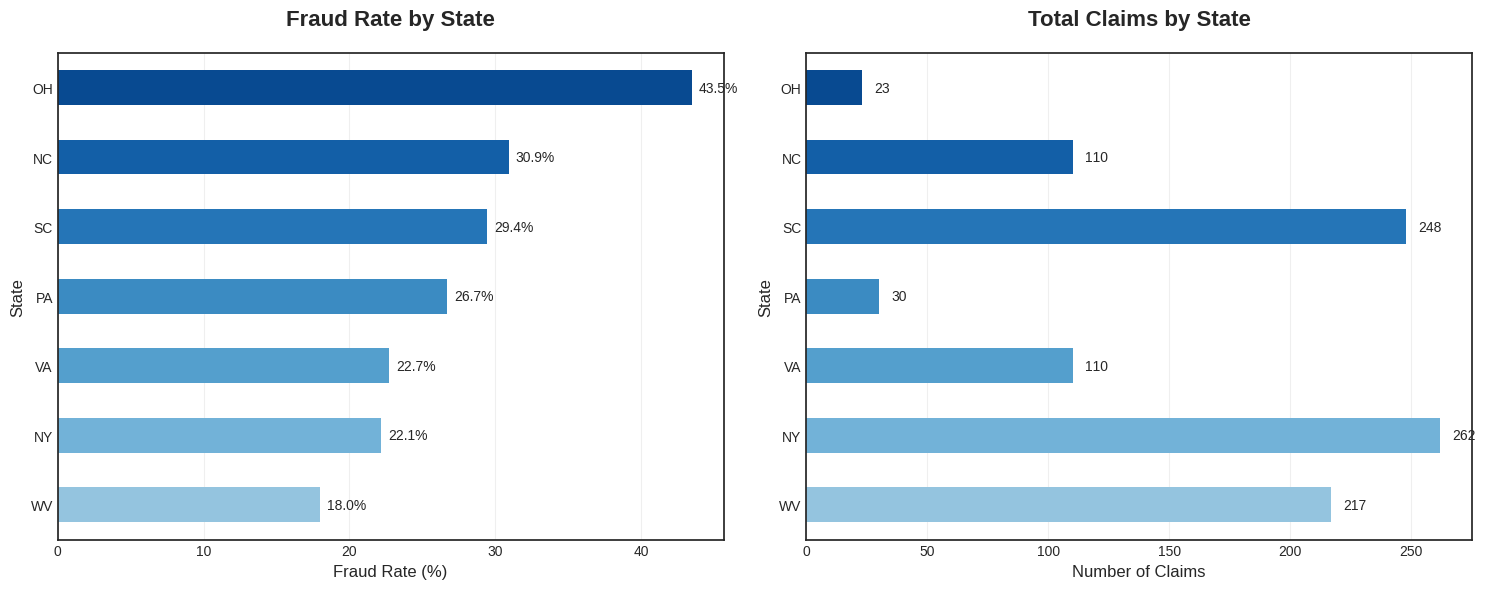


4. STATE-LEVEL INCIDENT PATTERNS
----------------------------------------


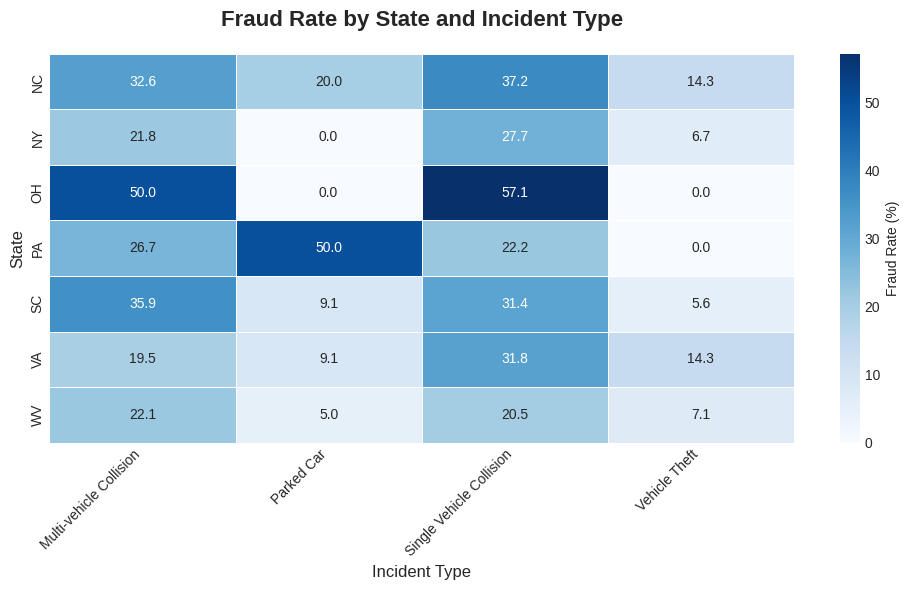


5. GEOGRAPHIC INSIGHTS
----------------------------------------
Overall fraud rate: 24.7%

High-risk states (above average): NC, OH, PA, SC
Low-risk states (below average): NY, VA, WV

6. TOP CITIES BY FRAUD RATE
----------------------------------------


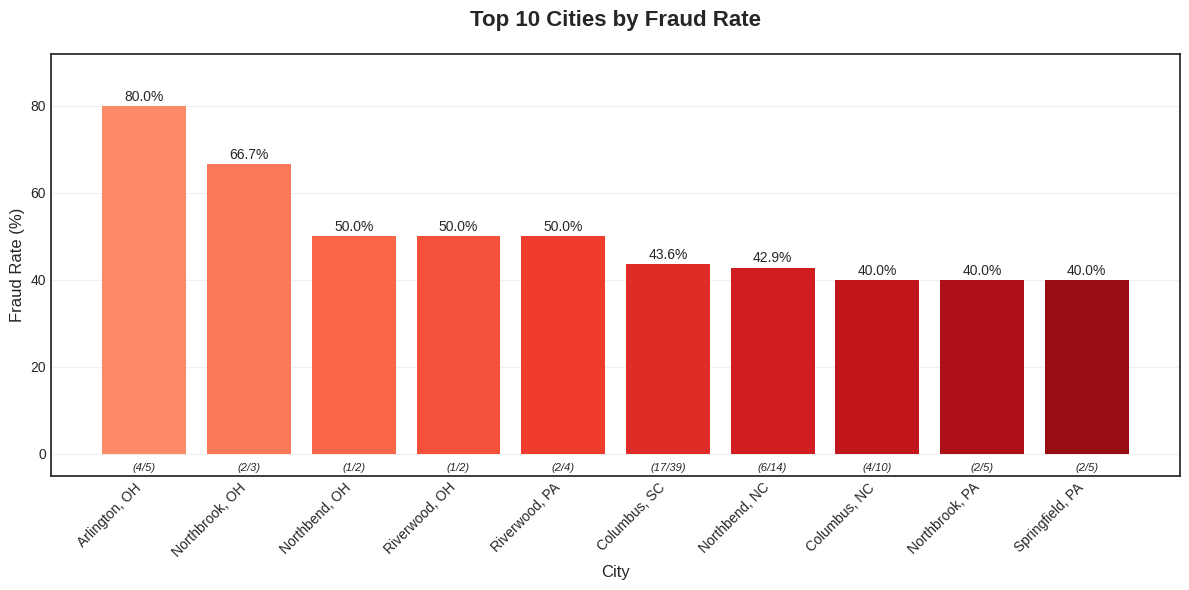

In [40]:
# 1. Prepare geographic data
state_fraud = insurance_fraud_df.groupby('incident_state').agg({
    'fraud_reported': lambda x: (x == 'Y').sum(),
    'policy_number': 'count'
}).rename(columns={'fraud_reported': 'fraud_count', 'policy_number': 'total_claims'})

state_fraud['fraud_rate'] = (state_fraud['fraud_count'] / state_fraud['total_claims']) * 100
state_fraud['legitimate_count'] = state_fraud['total_claims'] - state_fraud['fraud_count']
state_fraud = state_fraud.reset_index()

print("\nFraud Statistics by State:")
print("-" * 40)
for _, row in state_fraud.sort_values('fraud_rate', ascending=False).iterrows():
    print(f"{row['incident_state']}: {row['fraud_rate']:.1f}% fraud rate "
          f"({row['fraud_count']}/{row['total_claims']} claims)")

# 2. Create US map visualization using Plotly
import plotly.graph_objects as go
import plotly.express as px

# Create choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=state_fraud['incident_state'],
    z=state_fraud['fraud_rate'],
    locationmode='USA-states',
    colorscale='Blues',
    text=state_fraud['incident_state'],
    customdata=np.column_stack((state_fraud['fraud_count'],
                                state_fraud['total_claims'],
                                state_fraud['fraud_rate'])),
    hovertemplate='<b>%{text}</b><br>' +
                  'Fraud Rate: %{customdata[2]:.1f}%<br>' +
                  'Fraudulent Claims: %{customdata[0]}<br>' +
                  'Total Claims: %{customdata[1]}<br>' +
                  '<extra></extra>',
    colorbar_title="Fraud Rate (%)",
))

fig.update_layout(
    title={
        'text': 'Insurance Fraud Rate by State',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24}
    },
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
    ),
    width=1000,
    height=600
)

fig.show()

# 3. Bar chart comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Fraud rate by state
state_fraud_sorted = state_fraud.sort_values('fraud_rate', ascending=True)
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(state_fraud_sorted)))

state_fraud_sorted.plot(kind='barh', x='incident_state', y='fraud_rate',
                       ax=ax1, color=colors, legend=False)
ax1.set_xlabel('Fraud Rate (%)', fontsize=12)
ax1.set_ylabel('State', fontsize=12)
ax1.set_title('Fraud Rate by State', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, row) in enumerate(state_fraud_sorted.iterrows()):
    ax1.text(row['fraud_rate'] + 0.5, i, f"{row['fraud_rate']:.1f}%",
             va='center', fontsize=10)

# Total claims by state
state_fraud_sorted.plot(kind='barh', x='incident_state', y='total_claims',
                       ax=ax2, color=colors, legend=False)
ax2.set_xlabel('Number of Claims', fontsize=12)
ax2.set_ylabel('State', fontsize=12)
ax2.set_title('Total Claims by State', fontsize=16, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, row) in enumerate(state_fraud_sorted.iterrows()):
    ax2.text(row['total_claims'] + 5, i, f"{row['total_claims']}",
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Heatmap of state vs incident characteristics
print("\n4. STATE-LEVEL INCIDENT PATTERNS")
print("-" * 40)

# Create pivot table for heatmap
state_incident_pivot = pd.crosstab(
    insurance_fraud_df['incident_state'],
    insurance_fraud_df['incident_type'],
    values=insurance_fraud_df['fraud_reported'].map({'Y': 1, 'N': 0}),
    aggfunc='mean'
) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(state_incident_pivot,
            annot=True,
            fmt='.1f',
            cmap='Blues',
            cbar_kws={'label': 'Fraud Rate (%)'},
            linewidths=0.5)
plt.title('Fraud Rate by State and Incident Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Geographic clustering analysis
print("\n5. GEOGRAPHIC INSIGHTS")
print("-" * 40)

# Identify high-risk states
overall_fraud_rate = (insurance_fraud_df['fraud_reported'] == 'Y').mean() * 100
high_risk_states = state_fraud[state_fraud['fraud_rate'] > overall_fraud_rate]['incident_state'].tolist()
low_risk_states = state_fraud[state_fraud['fraud_rate'] <= overall_fraud_rate]['incident_state'].tolist()

print(f"Overall fraud rate: {overall_fraud_rate:.1f}%")
print(f"\nHigh-risk states (above average): {', '.join(high_risk_states)}")
print(f"Low-risk states (below average): {', '.join(low_risk_states)}")

# 6. City-level analysis within states
print("\n6. TOP CITIES BY FRAUD RATE")
print("-" * 40)

city_fraud = insurance_fraud_df.groupby(['incident_city', 'incident_state']).agg({
    'fraud_reported': lambda x: (x == 'Y').sum(),
    'policy_number': 'count'
}).rename(columns={'fraud_reported': 'fraud_count', 'policy_number': 'total_claims'})

city_fraud['fraud_rate'] = (city_fraud['fraud_count'] / city_fraud['total_claims']) * 100
city_fraud = city_fraud.reset_index()
city_fraud['city_state'] = city_fraud['incident_city'] + ', ' + city_fraud['incident_state']

# Top 10 cities by fraud rate
top_cities = city_fraud.nlargest(10, 'fraud_rate')

plt.figure(figsize=(12, 6))
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_cities)))
bars = plt.bar(range(len(top_cities)), top_cities['fraud_rate'], color=colors)

plt.xlabel('City', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.title('Top 10 Cities by Fraud Rate', fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(top_cities)), top_cities['city_state'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (idx, row) in enumerate(top_cities.iterrows()):
    plt.text(i, row['fraud_rate'] + 0.5, f"{row['fraud_rate']:.1f}%",
             ha='center', va='bottom', fontsize=10)
    plt.text(i, -2, f"({row['fraud_count']}/{row['total_claims']})",
             ha='center', va='top', fontsize=8, style='italic')

plt.ylim(-5, max(top_cities['fraud_rate']) * 1.15)
plt.tight_layout()
plt.show()



### 2.9 Risk Scoring Insights
<a id='2.9 Risk Scoring Insights'></a>


RISK SCORING INSIGHTS
----------------------------------------
Average Risk Score:
  Fraudulent claims: 31.3
  Legitimate claims: 32.2



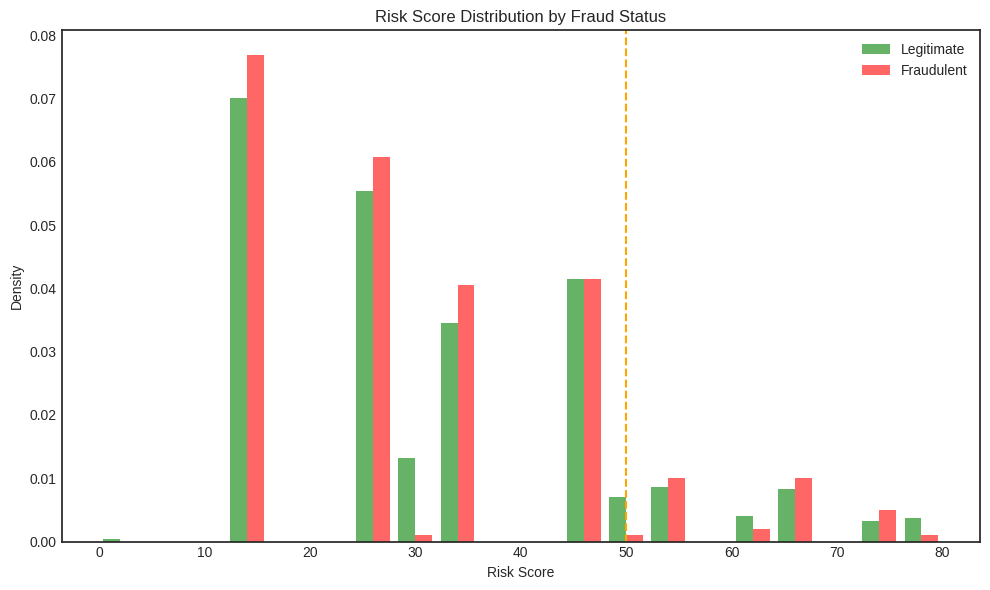

In [39]:
print("\nRISK SCORING INSIGHTS")
print("-" * 40)

# Create a simple risk score based on key indicators
def calculate_risk_score(row):
    score = 0
    # Hour of incident (2-5 AM)
    if 2 <= row['incident_hour_of_the_day'] <= 5:
        score += 30
    # No police report
    if row['police_report_available'] == 'NO':
        score += 20
    # No authorities contacted
    if row['authorities_contacted'] == 'None':
        score += 15
    # High claim relative to premium
    if row['total_claim_amount'] > row['policy_annual_premium'] * 2:
        score += 15
    # New customer (< 6 months)
    if row['months_as_customer'] < 6:
        score += 10
    # Multiple vehicles involved
    if row['number_of_vehicles_involved'] > 2:
        score += 10
    return score

insurance_fraud_df['risk_score'] = insurance_fraud_df.apply(calculate_risk_score, axis=1)

# Compare risk scores
print(f"Average Risk Score:")
print(f"  Fraudulent claims: {insurance_fraud_df[insurance_fraud_df['fraud_reported'] == 'Y']['risk_score'].mean():.1f}")
print(f"  Legitimate claims: {insurance_fraud_df[insurance_fraud_df['fraud_reported'] == 'N']['risk_score'].mean():.1f}\n")

# Visualize risk score distribution
plt.figure(figsize=(10, 6))
fraud_risk = insurance_fraud_df[insurance_fraud_df['fraud_reported'] == 'Y']['risk_score']
legit_risk = insurance_fraud_df[insurance_fraud_df['fraud_reported'] == 'N']['risk_score']

plt.hist([legit_risk, fraud_risk], bins=20, alpha=0.6, label=['Legitimate', 'Fraudulent'],
         color=['green', 'red'], density=True)
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.title('Risk Score Distribution by Fraud Status')
plt.legend()
plt.axvline(x=50, color='orange', linestyle='--', label='High Risk Threshold')
plt.tight_layout()
plt.show()


### 2.10 Correlation Analysis
<a id='2.10 Correlation Analysis'></a>


CORRELATION ANALYSIS SUMMARY

Top 10 Variables Correlated with Fraud:
------------------------------------------------------------
vehicle_claim......................   0.170 ***
total_claim_amount.................   0.164 ***
property_claim.....................   0.138 ***
injury_claim.......................   0.091 **
umbrella_limit.....................   0.058 
number_of_vehicles_involved........   0.052 
witnesses..........................   0.049 
bodily_injuries....................   0.034 
months_as_customer.................   0.021 
capital-gains......................  -0.019 

*** p < 0.001, ** p < 0.01, * p < 0.05

KEY INSIGHTS FROM CORRELATION ANALYSIS
• vehicle_claim: Positive correlation (r=0.170) - Higher values associated with fraud
• total_claim_amount: Positive correlation (r=0.164) - Higher values associated with fraud
• property_claim: Positive correlation (r=0.138) - Higher values associated with fraud
• Incident timing shows weak correlation with fraud

MULTIVARIA

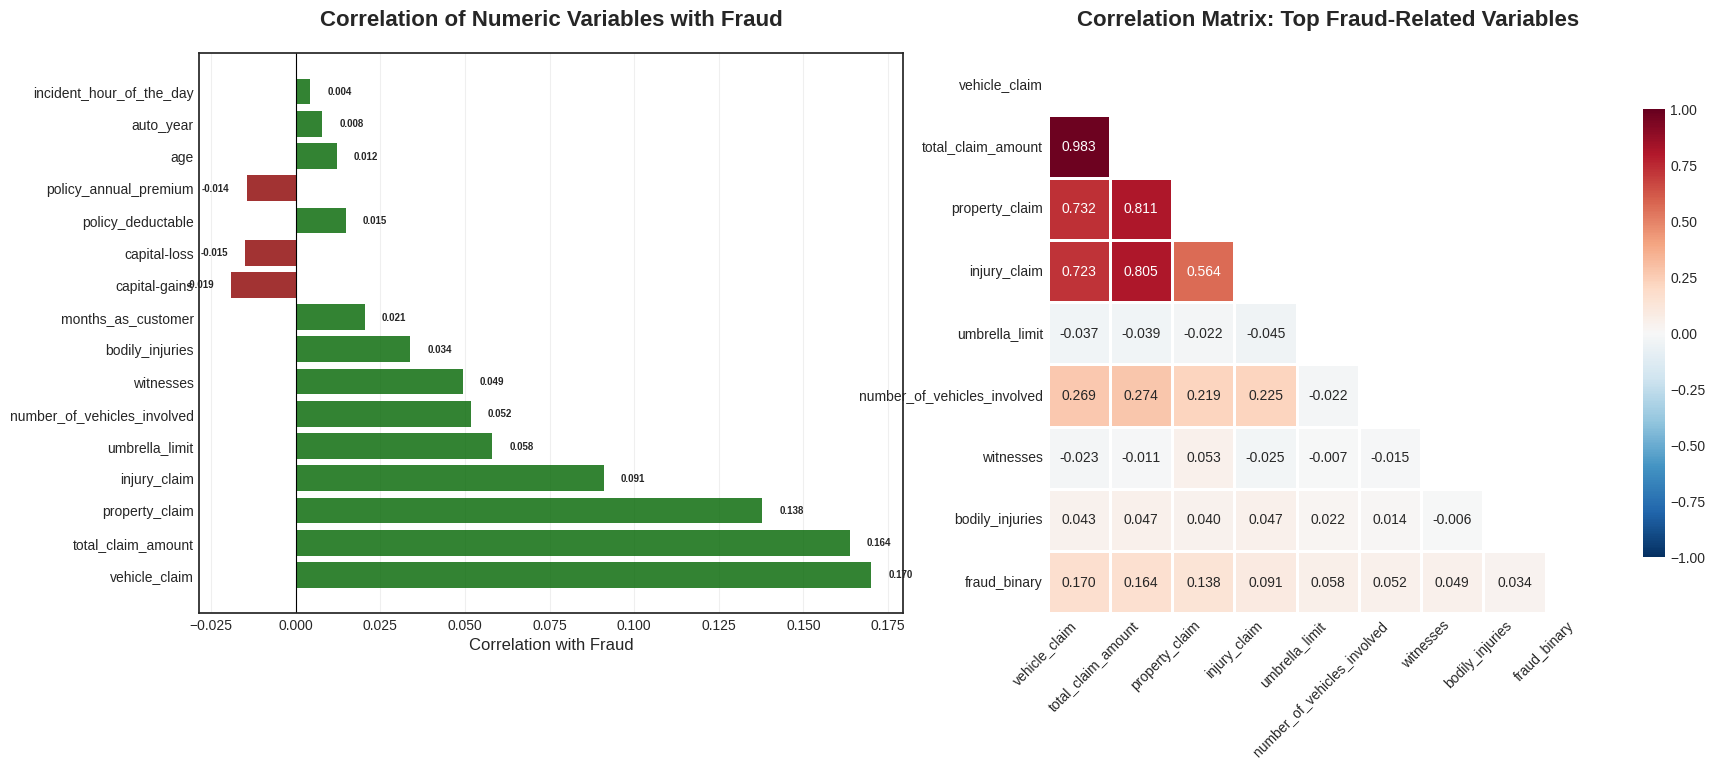

In [51]:
def perform_correlation_analysis(insurance_fraud_df):
    """
    Perform comprehensive correlation analysis between numeric variables and fraud occurrence
    """

    # Convert fraud_reported to binary numeric
    insurance_fraud_df['fraud_binary'] = (insurance_fraud_df['fraud_reported'] == 'Y').astype(int)

    # Select numeric columns for correlation analysis
    numeric_cols = [
        'months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
        'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
        'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
        'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
        'auto_year', 'fraud_binary'
    ]

    # Create correlation matrix
    corr_matrix = insurance_fraud_df[numeric_cols].corr()

    # Extract fraud correlations and sort by absolute value
    fraud_correlations = corr_matrix['fraud_binary'].drop('fraud_binary').sort_values(key=abs, ascending=False)

    # Point-biserial correlations for more accurate binary-continuous relationships
    pb_correlations = {}
    for col in numeric_cols[:-1]:  # Exclude fraud_binary itself
        if insurance_fraud_df[col].notna().sum() > 0:  # Check for valid data
            corr, p_value = pointbiserialr(insurance_fraud_df['fraud_binary'].dropna(),
                                          insurance_fraud_df[col].dropna())
            pb_correlations[col] = {'correlation': corr, 'p_value': p_value}

    # Create visualizations
    fig = plt.figure(figsize=(20, 16))

    # 1. Fraud Correlation Bar Chart
    plt.subplot(2, 2, 1)
    colors = ['darkred' if x < 0 else 'darkgreen' for x in fraud_correlations.values]
    bars = plt.barh(range(len(fraud_correlations)), fraud_correlations.values, color=colors, alpha=0.8)
    plt.yticks(range(len(fraud_correlations)), fraud_correlations.index)
    plt.xlabel('Correlation with Fraud', fontsize=12)
    plt.title('Correlation of Numeric Variables with Fraud', fontsize=16, fontweight='bold', pad=20)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(True, alpha=0.3, axis='x')

    # Add correlation values on bars
    for i, (idx, val) in enumerate(fraud_correlations.items()):
        plt.text(val + 0.005 if val > 0 else val - 0.005, i, f'{val:.3f}',
                va='center', ha='left' if val > 0 else 'right', fontweight='bold', fontsize=9)


    # 2. Correlation Heatmap (Top Variables)
    plt.subplot(2, 2, 2)
    top_fraud_vars = fraud_correlations.head(8).index.tolist() + ['fraud_binary']
    top_corr_matrix = insurance_fraud_df[top_fraud_vars].corr()

    mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool))
    sns.heatmap(top_corr_matrix, mask=mask, annot=True, fmt='.3f',
                cmap='RdBu_r', center=0, square=True, linewidths=1,
                cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
    plt.title('Correlation Matrix: Top Fraud-Related Variables', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)


    # Print summary statistics
    print("\n" + "="*60)
    print("CORRELATION ANALYSIS SUMMARY")
    print("="*60)
    print("\nTop 10 Variables Correlated with Fraud:")
    print("-"*60)

    for var, corr in fraud_correlations.head(10).items():
        if var in pb_correlations:
            p_val = pb_correlations[var]['p_value']
            sig = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
            print(f"{var:.<35} {corr:>7.3f} {sig}")
        else:
            print(f"{var:.<35} {corr:>7.3f}")

    print("\n*** p < 0.001, ** p < 0.01, * p < 0.05")

    # Key insights
    print("\n" + "="*60)
    print("KEY INSIGHTS FROM CORRELATION ANALYSIS")
    print("="*60)

    insights = []

    # Analyze strongest correlations
    strongest_pos = fraud_correlations.head(3)
    strongest_neg = fraud_correlations.tail(3)

    for var, corr in strongest_pos.items():
        if abs(corr) > 0.1:
            insights.append(f"• {var}: Positive correlation (r={corr:.3f}) - Higher values associated with fraud")

    for var, corr in strongest_neg.items():
        if abs(corr) > 0.1:
            insights.append(f"• {var}: Negative correlation (r={corr:.3f}) - Lower values associated with fraud")

    # Special patterns
    if 'incident_hour_of_the_day' in fraud_correlations:
        insights.append(f"• Incident timing shows {'weak' if abs(fraud_correlations['incident_hour_of_the_day']) < 0.1 else 'moderate'} correlation with fraud")

    if 'months_as_customer' in fraud_correlations:
        if fraud_correlations['months_as_customer'] < -0.05:
            insights.append("• Newer customers show higher fraud risk (negative correlation with tenure)")

    for insight in insights:
        print(insight)

    # Risk factor combinations
    print("\n" + "="*60)
    print("MULTIVARIATE RISK PATTERNS")
    print("="*60)

    # Analyze combinations of top risk factors
    top_3_vars = fraud_correlations.head(3).index.tolist()

    # Create risk score based on top correlates
    risk_score = 0
    for var in top_3_vars:
        # Normalize each variable to 0-1 scale
        normalized = (insurance_fraud_df[var] - insurance_fraud_df[var].min()) / \
                    (insurance_fraud_df[var].max() - insurance_fraud_df[var].min())
        risk_score += normalized * abs(fraud_correlations[var])

    # Divide into risk quartiles
    insurance_fraud_df['risk_quartile'] = pd.qcut(risk_score, q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    risk_analysis = pd.crosstab(insurance_fraud_df['risk_quartile'],
                               insurance_fraud_df['fraud_reported'], normalize='index') * 100

    print("\nFraud Rate by Risk Quartile (based on top 3 correlates):")
    print("-"*60)
    for quartile in ['Low', 'Medium', 'High', 'Very High']:
        if quartile in risk_analysis.index:
            fraud_rate = risk_analysis.loc[quartile, 'Y']
            print(f"{quartile} Risk:".ljust(15) + f"{fraud_rate:>6.1f}% fraud rate")

    plt.show()

    return fraud_correlations, pb_correlations

fraud_corr, pb_corr = perform_correlation_analysis(insurance_fraud_df)

### 2.11 Summary of Key Findings
<a id='2.11 Summary of Key Findings'></a>

**Overall Fraud Statistics**

* 24.7% of claims are fraudulent (247 out of 1,000 claims)
* Fraudulent claims are 19.9% higher in value than legitimate claims ($60,302 vs $50,288)

**Incident Type Patterns**

* Single Vehicle Collision has the highest fraud rate at 29.0%
* Multi-vehicle Collision follows closely at 27.2%
* Vehicle Theft and Parked Car incidents have notably lower fraud rates (8.5% and 9.5% respectively)
* Collision-related incidents are 3x more likely to be fraudulent than non-collision incidents

**Time Series Patterns**

* Peak fraud hours: 11am, 2pm, 3pm, 4pm, and 6pm (all showing 30%+ fraud rates)
* Early morning hours (2am-5am) show suspicious activity patterns
* Weekend fraud rates are elevated: Saturday (28.3%) and Monday (29.4%) exceed the average

**Financial Impact**

* Fraudulent claims average $60,302 vs $50,288 for legitimate claims - 19.9% higher
* Fraudulent claims consistently push toward policy limits across all severity levels
* High-value fraudulent claims often come from policies with moderate premiums


**Behavioral Red Flags**

* Low authorities contact: Only 2.4% of fraudulent claims had no authorities contacted (vs 11.3% legitimate)
* Police reports: No significant difference in police report availability between fraud/legitimate
* Fire and Other authorities are contacted more frequently in fraudulent claims

**Customer Profile Insights**

* Executive-managerial occupation has the highest fraud rate at 36.8%
* Education: Advanced degrees (MD, JD, PhD) show slightly higher fraud rates (26.4%)
* Customers with 300+ months tenure show elevated fraud risk at 26.8%
* Age: No significant age-based patterns observed

**Vehicle Patterns**

* Luxury brands have higher fraud rates: Mercedes (33.8%), Ford (30.6%), Audi (30.4%)
* Specific models like BMW X6 and Chevrolet Silverado exceed 40% fraud rates
* Vehicle age: 11-year-old vehicles show highest fraud rate (60%+)
* Older vehicles: Generally correlate with higher fraud risk

Geographic Concentration:

* Ohio leads with 43.5% fraud rate - nearly double the overall average
* 4 states exceed the average fraud rate: OH, NC, SC, PA
* West Virginia has the lowest rate at 18.0%
* Clear geographic clustering suggests potential fraud rings in specific regions
* City-level analysis reveals concentrated fraud activity in specific urban areas

Key Risk Indicators:

* Collision type incidents + business hours timing + high claim amounts = High fraud probability
* Luxury vehicles + executive occupation + specific geographic locations = Elevated risk profile
* Weekend incidents + early morning hours + single vehicle collisions = Suspicious pattern

**Data Quality Issues**

* One claim filed before policy start date (potential fraud indicator)


## 3. Building the Dashboard
<a id='3. Building the Dashboard'></a>

### 3.1 Export dataset for visualization
<a id='3.1 Export dataset for visualization'></a>

In [58]:
# Export the cleaned dataset to CSV for Power BI
insurance_fraud_df.to_csv('insurance_fraud_powerbi.csv', index=False)

print(f"✅ Export complete!")
print(f"📊 Dataset: {len(insurance_fraud_df)} rows × {len(insurance_fraud_df.columns)} columns")
print(f"📁 File: insurance_fraud_powerbi.csv")

display(insurance_fraud_df.head())

✅ Export complete!
📊 Dataset: 1000 rows × 47 columns
📁 File: insurance_fraud_powerbi.csv


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,calculated_total,day_of_week,day_number,tenure_group,vehicle_age,risk_score,fraud_binary,risk_quartile
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2004,Y,71610,Sunday,6,300+,11,45,1,Very High
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2007,Y,5070,Wednesday,2,201-300,8,15,1,Low
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2007,N,34650,Sunday,6,101-200,8,45,0,Low
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2014,Y,63400,Saturday,5,201-300,1,65,1,High
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,2009,N,6500,Tuesday,1,201-300,6,50,0,Low
